# Assignment objective

In this assignment you will apply several tactics in order to detect potential risks in a population of borrowers. This tactics would be used in order to determine whether the deployment of the flyer program in Raleigh, NC, may have had the adverse effect of increasing activation disproportionally more for riskier borrowers.

# General remark 

Throughout the assignment, you are encouraged to use certain packages for various objectives. These are only recommendations, feel free to use a different package if you feel more comfortable with it or write your own code. Everything goes, as long as the output is correct!

# Basic imports


In [1]:
!pip install statsmodels
!pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot_2samples
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

# Data preparation

Start by reading the processed activation tables from Raleigh and Lubbock. These are available on the assignment's `s3` path, which can be imported from `pagayapro.data_paths.data_paths.ASSIGNMENT2_DATA`. 

In [4]:
from pagayapro.paths.data_paths import ASSIGNMENT2_DATA

In [5]:
raleigh_table = pd.read_csv(os.path.join(ASSIGNMENT2_DATA,"raleigh_final_activation_table.csv"))

In [6]:
lubbock_table = pd.read_csv(os.path.join(ASSIGNMENT2_DATA,"lubbock_final_activation_table.csv"))

Disply the first 5 rows of each table. How many rows are there in each table?

In [7]:
raleigh_table.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,94fe9530622e8302e12906e7a65f58d1e164bc0d05f514...,90e4b7a2dc13cb20f06723807c7a4bba4da57875ff2e51...,2500.0,11.97,False,2020-10-23
1,423a4e06ace6d70156cb1d3f6f8c2e327788cf00df43f5...,31ec3034b1c29c120fad2776bec57c21d42a4b1b0e6cf5...,3500.0,24.37,False,2019-07-12
2,ae1e5ef03b7ea096d65d46ffc334273a3234fc0e414a4c...,9707b1364bcd918a919db139c3d7402c85aee1eb3dfb9d...,3026.0,30.32,False,2018-08-24
3,3fc1e327a430b8895508e697c901f5da85eee7f5db19f3...,509c8db99695731191f5c2fc20b4e664d7aa108530ba65...,3000.0,12.94,True,2019-09-16
4,96a39f00dc2322233b9e080114030898ada13a904ccc29...,2ba1b1a11ec63ca7d0f8cc0cd5527d591dfea6716f54b2...,5000.0,16.89,False,2019-11-12


In [8]:
lubbock_table.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,55ede7a145fc312ed7206bfde6b1597f995a9e7cdf42e6...,3464754c8bef531e7e90f0d83cd4df04ea2d7e24ba75cd...,5300.0,32.05,False,2020-04-24
1,c3a63cef599c03c7af1258fb58bf2164ae2b57699ece7e...,ed16849cf72e00d9f0593604ce7dc5c754435d1c696f2b...,14000.0,15.26,False,2019-04-29
2,1f91c6b7b97c43ad691241faf61fb6634ed298eb7de8f9...,e8ff4579419d35c833ac8d5dc726ba44a04a054a82e203...,10500.0,5.49,False,2020-04-29
3,7d4cae1e2bba10256b5f115cd797cf1d255d4aacab9d17...,8efa42707a799ef939ec9b7f2f6220e6e5f9aefdb306af...,19500.0,11.10,True,2020-08-04
4,f5aa5c275def34cc3e6b533d41a8b706558babe30f35e2...,90cd5ac4b02cc83a48b924795e2fdf87e60ebbdf63065c...,30000.0,11.61,True,2018-05-04


In [9]:
print("Num of rows in each table:")
print("raleigh_table: ",len(raleigh_table))
print("lubbock_table: ",len(lubbock_table))

Num of rows in each table:
raleigh_table:  8792
lubbock_table:  11320


In order to analyze borrowers in Raleigh and Lubbock, we would like to enriched these tables with features from TU. These features are available (as in the previous assignment) in the file `tu_gen_data_2018Q3.parquet` in the path in `pagayapro.paths.data_paths.DATA_FILES_PATH`.

In [10]:
from pagayapro.paths.data_paths import DATA_FILES_PATH
tu_2018Q3= pd.read_parquet(os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state","ads66wdc_audit_score"])

In [11]:
tu_2018Q3_all= pd.read_parquet(os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"))


In [12]:
tu_2018Q3_all

,revs101,revs102,revs103,revs104,revs105,revs106,revs107,revs108,revs109,revs110,...,is_purpose_4,is_purpose_10,is_purpose_11,is_purpose_12,zip,monthly_debt,pre_loan_dti,zero_int_pti,zero_int_post_loan_dti,pti
id,,,,,,,,,,,,,,,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,834,891,2493,155,368,911,1105,1703,136,1346,...,False,False,False,False,32503,1016.0,NaN,NaN,NaN,NaN
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2164,166,5037,5682,2368,64,3155,1045,3677,2447,...,False,False,False,False,10706,1154.0,NaN,NaN,NaN,NaN
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,69,198,14,19,333,343,8,88,34,8,...,False,False,False,False,70128,379.0,NaN,NaN,NaN,NaN
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,0,0,48,2,0,23,1,16,106,0,...,False,False,False,False,98032,961.0,NaN,NaN,NaN,NaN
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,436,608,154,190,365,656,282,380,570,448,...,False,False,False,False,17013,2029.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011850581661f8b9b43f009852877e85ebc30aa0a6c86d8603ecf8646d9f31d,2000,25,1254,0,0,1403,1208,1045,275,958,...,False,False,False,False,08059,1366.0,NaN,NaN,NaN,NaN
bd0b26d176d0a9c2039723f02048a7989e85586374ab8d9a2b5b0529c2899f13,620,976,402,290,410,498,258,500,243,57,...,False,False,False,False,40475,923.0,NaN,NaN,NaN,NaN
3503894d630dc781ebd68989e8ce8f53c7a7a842c56c2a0f51086ddc0d11ba32,278,277,273,673,217,559,1368,1262,347,60,...,False,False,False,False,03811,965.0,NaN,NaN,NaN,NaN


In [13]:
tu_2018Q3_all['ads66wdc_audit_score'].value_counts()

820.0    23258
796.0     7262
773.0     7005
776.0     6997
792.0     6934
         ...  
474.0        1
470.0        1
471.0        1
468.0        1
467.0        1
Name: ads66wdc_audit_score, Length: 355, dtype: int64

In [14]:
tu_2018Q3_all.filter(like='audit_score').columns

Index(['ads40w94_audit_score', 'cbp01w86_audit_score', 'ads58wq9_audit_score',
       'ads42w96_audit_score', 'aup01w44_audit_score', 'ads57wq6_audit_score',
       'oap01w53_audit_score', 'mtp01w47_audit_score', 'ins34w52_audit_score',
       'ads19v64_audit_score', 'syf01wb1_audit_score', 'hep01v83_audit_score',
       'usp01w45_audit_score', 'ads45w98_audit_score', 'ads47wa1_audit_score',
       'plr01wf1_audit_score', 'ads67wdf_audit_score', 'ads20v82_audit_score',
       'ads23w05_audit_score', 'bcp01w48_audit_score', 'ads51wg2_audit_score',
       'iap01w54_audit_score', 'ads66wdc_audit_score'],
      dtype='object')

In [15]:
tu_2018Q3.head()

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,ads66wdc_audit_score
id,,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI,818.0
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM,723.0
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD,701.0
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC,625.0
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN,657.0


Merge the activation tables from Raleigh and Lubbock with TU's features

In [16]:
raleigh_table = raleigh_table.merge(tu_2018Q3_all,on=['id','sequence_num'])
raleigh_table.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,revs101,revs102,revs103,revs104,...,is_purpose_4,is_purpose_10,is_purpose_11,is_purpose_12,zip,monthly_debt,pre_loan_dti,zero_int_pti,zero_int_post_loan_dti,pti
0,94fe9530622e8302e12906e7a65f58d1e164bc0d05f514...,90e4b7a2dc13cb20f06723807c7a4bba4da57875ff2e51...,2500.0,11.97,False,2020-10-23,0,0,33,2,...,False,False,False,False,56449,207.0,NaN,NaN,NaN,NaN
1,423a4e06ace6d70156cb1d3f6f8c2e327788cf00df43f5...,31ec3034b1c29c120fad2776bec57c21d42a4b1b0e6cf5...,3500.0,24.37,False,2019-07-12,684,420,1408,1043,...,False,False,False,False,54301,961.0,NaN,NaN,NaN,NaN
2,ae1e5ef03b7ea096d65d46ffc334273a3234fc0e414a4c...,9707b1364bcd918a919db139c3d7402c85aee1eb3dfb9d...,3026.0,30.32,False,2018-08-24,112,232,148,93,...,False,False,False,False,96761,731.0,NaN,NaN,NaN,NaN
3,3fc1e327a430b8895508e697c901f5da85eee7f5db19f3...,509c8db99695731191f5c2fc20b4e664d7aa108530ba65...,3000.0,12.94,True,2019-09-16,384,267,321,185,...,False,False,False,False,92395,1410.0,NaN,NaN,NaN,NaN
4,96a39f00dc2322233b9e080114030898ada13a904ccc29...,2ba1b1a11ec63ca7d0f8cc0cd5527d591dfea6716f54b2...,5000.0,16.89,False,2019-11-12,198,149,381,264,...,False,False,False,False,24141,142.0,NaN,NaN,NaN,NaN


In [17]:
lubbock_table = lubbock_table.merge(tu_2018Q3_all,on=['id','sequence_num'])
lubbock_table.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,revs101,revs102,revs103,revs104,...,is_purpose_4,is_purpose_10,is_purpose_11,is_purpose_12,zip,monthly_debt,pre_loan_dti,zero_int_pti,zero_int_post_loan_dti,pti
0,55ede7a145fc312ed7206bfde6b1597f995a9e7cdf42e6...,3464754c8bef531e7e90f0d83cd4df04ea2d7e24ba75cd...,5300.0,32.05,False,2020-04-24,36,0,0,56,...,False,False,False,False,23224,158.0,NaN,NaN,NaN,NaN
1,c3a63cef599c03c7af1258fb58bf2164ae2b57699ece7e...,ed16849cf72e00d9f0593604ce7dc5c754435d1c696f2b...,14000.0,15.26,False,2019-04-29,491,1243,971,369,...,False,False,False,False,76001,2054.0,NaN,NaN,NaN,NaN
2,1f91c6b7b97c43ad691241faf61fb6634ed298eb7de8f9...,e8ff4579419d35c833ac8d5dc726ba44a04a054a82e203...,10500.0,5.49,False,2020-04-29,448,396,66,8983,...,False,False,False,False,12189,1077.0,NaN,NaN,NaN,NaN
3,7d4cae1e2bba10256b5f115cd797cf1d255d4aacab9d17...,8efa42707a799ef939ec9b7f2f6220e6e5f9aefdb306af...,19500.0,11.10,True,2020-08-04,0,844,371,0,...,False,False,False,False,30014,817.0,NaN,NaN,NaN,NaN
4,f5aa5c275def34cc3e6b533d41a8b706558babe30f35e2...,90cd5ac4b02cc83a48b924795e2fdf87e60ebbdf63065c...,30000.0,11.61,True,2018-05-04,467,216,267,2366,...,False,False,False,False,07003,1486.0,NaN,NaN,NaN,NaN


Make sure that the merge operation did not change the number of rows in either of the tables

In [18]:
print("Num of rows in each table are still:")
print("raleigh_table: ",len(raleigh_table))
print("lubbock_table: ",len(lubbock_table))

Num of rows in each table are still:
raleigh_table:  8792
lubbock_table:  11320


# EDA 

To begin with, let's make sure that the general borrower population in Raleigh and Lubbock are similar. To do so, consider the features `credit_score`, `int_rate` and pick one-two more continuous features that seem important to you (look for ones whose name is meaningful). Compare the distributions of these features in Raleigh and in Lubbock by creating overlapping histograms. Make sure that your histograms are in `density=True` mode and that they are distributed over the same bins; otherwise, comparing them might be difficult.

In [19]:
df_list = [raleigh_table,lubbock_table]
color_list = ['skyblue','firebrick']
df_title_list = ['raleigh','lubbock']

In [20]:
# We noticed that setting the number of diffs to 3 instead of 1.5 brings more descriptive charts.
def remove_out_liars(series):
    q_25 =  series.quantile(q=0.25, interpolation='linear')
    q_75 =  series.quantile(q=0.75, interpolation='linear')
    diff = q_75 - q_25
    upper_lim = q_75 + (3 *diff)
    lower_lim = q_25 - (3 *diff)
    precentage_of_out_liars = ((series.values > upper_lim) | (series.values < lower_lim)).sum() / series.size
    return lower_lim,upper_lim, precentage_of_out_liars

In [21]:
import matplotlib.patches as mpatches

def plot_density_histogram(data_list,colors=['firebrick','skyblue'],x_lable='x',y_lable='y',titles=[],func_flag='hist',generla_title='', remove_outliers= False):
    
    bins = int(np.sqrt(len(data_list[0].unique())))
    plt.figure(figsize=(10,6))
    for i, data in enumerate(data_list):
        

        if func_flag == 'hist':
            plt.hist(data, bins=bins,
                     density=True,
                     alpha=0.5, color=colors[i], edgecolor='k', label='noisy')
        else:
            sns.distplot(data,color=colors[i],kde=True,bins=bins)
            
        median = data.median()
        mean = data.mean()
        
        plt.axvline(median,  linestyle='dashed', linewidth=3, alpha=0.5, color=colors[i])
        plt.axvline(mean, linewidth=3, color=colors[i])
        plt.xlabel(x_lable)
        plt.ylabel(y_lable)
        if remove_outliers:
            lower_lim,upper_lim, precentage_of_out_liars = remove_out_liars(data)
            titles[i] =  titles[i] + "  (Precent of outliars removed is: {}%)".format(str(np.round(100*precentage_of_out_liars,2)))
            plt.xlim(lower_lim,upper_lim)
        plt.grid(True)

        plt.title(generla_title)
    plt.legend()
    
    
    patches  = []
    for i,text in enumerate(titles):
        patches.append(mpatches.Patch(color=colors[i], label=titles[i]))
    plt.legend(handles=patches)

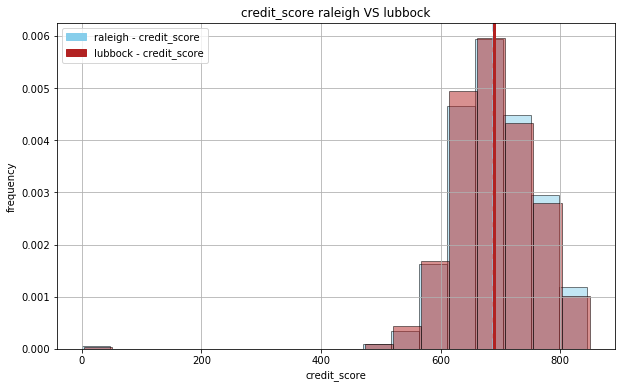

In [22]:
plot_density_histogram([df.credit_score for df in  df_list],color_list, 'credit_score','frequency',\
                       [title + " - credit_score" for title in df_title_list], generla_title = "credit_score raleigh VS lubbock")

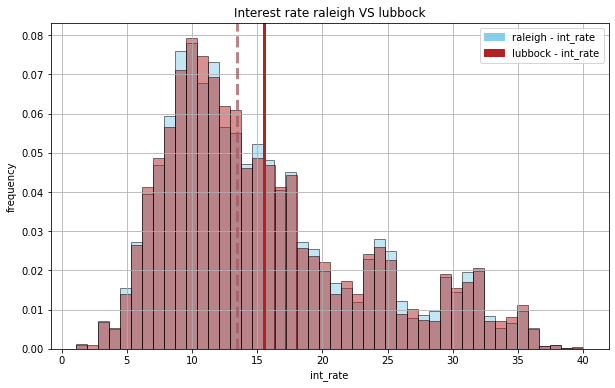

In [23]:
plot_density_histogram([df.int_rate for df in  df_list],color_list, 'int_rate','frequency',\
                       [title + " - int_rate" for title in df_title_list], generla_title = "Interest rate raleigh VS lubbock")

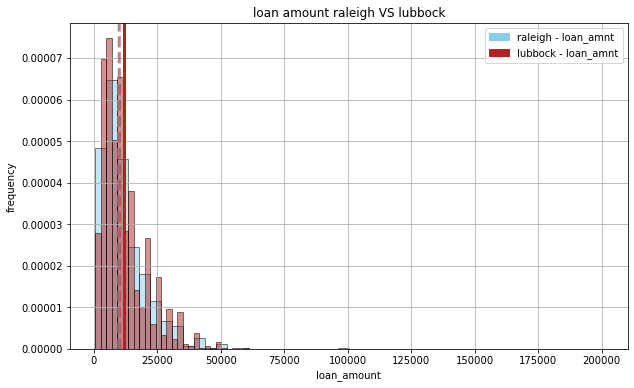

In [24]:
plot_density_histogram([df.loan_amnt for df in  df_list],color_list, 'loan_amount','frequency',\
                       [title + " - loan_amnt" for title in df_title_list],  generla_title = "loan amount raleigh VS lubbock")

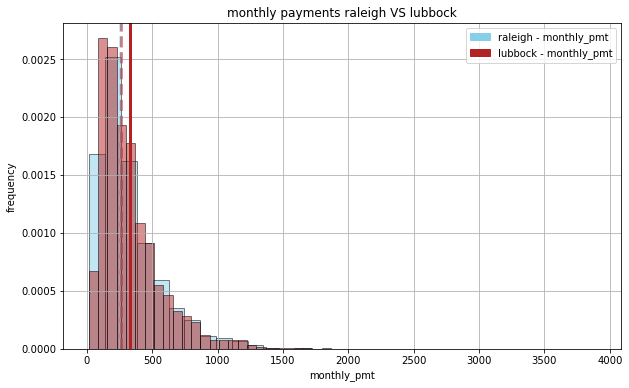

In [25]:
plot_density_histogram([df.monthly_pmt for df in  df_list],color_list, 'monthly_pmt','frequency',\
                       [title + " - monthly_pmt" for title in df_title_list], generla_title = "monthly payments raleigh VS lubbock")

Columns look different besides the loan amount where in we can see that rthe variance in reliegh is significanetly smaller

As you probably noticed, some borrowers have credit score values of 0. This can't be true, because credit score ranges from 350 to 850. Fix this by replacing these values with np.nan. Recreate the histograms after doing so, to make sure that they distributions still look the same.

In [26]:
raleigh_table.loc[raleigh_table['credit_score'] < 350,'credit_score'] = np.nan
lubbock_table.loc[lubbock_table['credit_score'] < 350,'credit_score'] = np.nan

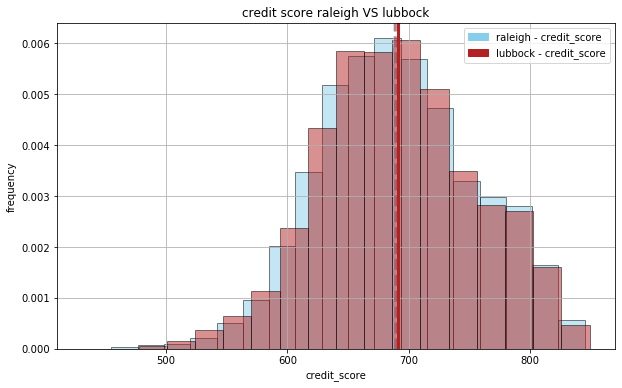

In [27]:
plot_density_histogram([df.credit_score for df in  df_list],color_list, 'credit_score','frequency',\
                       [title + " - credit_score" for title in df_title_list], generla_title = "credit score raleigh VS lubbock")

In [28]:
print("num of out of range credit scores lubbock_table: ", lubbock_table.credit_score.isna().sum())

num of out of range credit scores lubbock_table:  24


In [29]:
print("num of out of range credit scores raleigh_table: ", raleigh_table.credit_score.isna().sum())

num of out of range credit scores raleigh_table:  19


Another method for comparing the distributions of two columns is by using a [q-q-plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). Repeat the comparisons of the above 5 features by creating the corresponding q-q-plots. You can either use the `seaborn_qqplot` package or [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot_2samples.html)'s implemetation, or write your own function that creates this plot. 

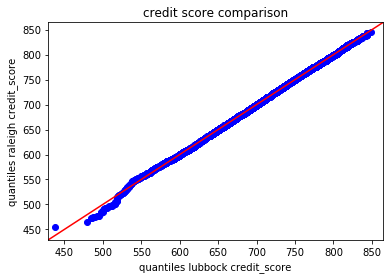

Raleigh median: 691.307193, Lubbock median: 691.491413


In [30]:
qqplot_2samples(raleigh_table.credit_score,lubbock_table.credit_score ,ylabel ='quantiles raleigh credit_score',xlabel ='quantiles lubbock credit_score',line='45')
plt.title("credit score comparison")
plt.show();
medians = [data.credit_score.mean() for data in df_list]
print("Raleigh median: {:f}, Lubbock median: {:f}".format(medians[0],medians[1]))

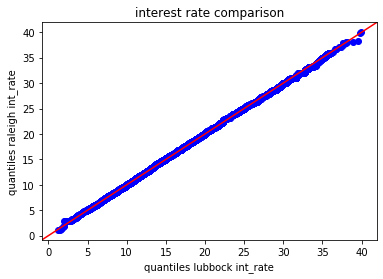

In [31]:
qqplot_2samples(raleigh_table.int_rate,lubbock_table.int_rate ,ylabel ='quantiles raleigh int_rate',xlabel ='quantiles lubbock int_rate', line='45')
plt.title("interest rate comparison")
plt.show();

In [32]:
raleigh_table.query('loan_amnt>=130000') # only one line outlier - we will not plot it

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,revs101,revs102,revs103,revs104,...,is_purpose_4,is_purpose_10,is_purpose_11,is_purpose_12,zip,monthly_debt,pre_loan_dti,zero_int_pti,zero_int_post_loan_dti,pti
1680,3d92c47347b3a7ec8322484ae1a9c6f274b738d9968e84...,4715c26135bad2c32d83e4f51e7e9eeb9aa98f8b4356fc...,200200.0,6.25,False,2018-01-11,-6,-6,-6,-6,...,False,False,False,False,83617,NaN,NaN,NaN,NaN,NaN


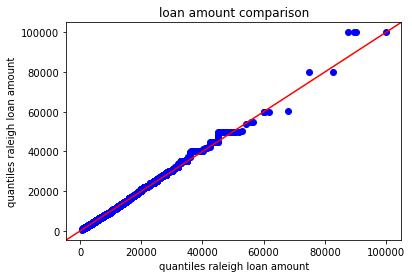

Raleigh median: 11730.960300, Lubbock median: 11712.100883


In [33]:
qqplot_2samples(raleigh_table.query('loan_amnt<130000').loan_amnt,lubbock_table.loan_amnt ,ylabel ='quantiles raleigh loan amount',xlabel ='quantiles raleigh loan amount', line='45')
plt.title("loan amount comparison")
plt.show();
medians = [data.query('loan_amnt<130000').loan_amnt.mean() for data in df_list]
print("Raleigh median: {:f}, Lubbock median: {:f}".format(medians[0],medians[1]))

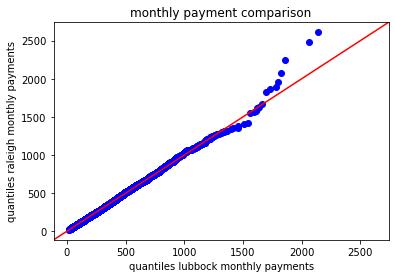

In [34]:
qqplot_2samples(raleigh_table.query('loan_amnt<130000').monthly_pmt,lubbock_table.monthly_pmt ,ylabel ='quantiles raleigh monthly payments',xlabel ='quantiles lubbock monthly payments', line='45')
plt.title("monthly payment comparison")
plt.show();

### <span style="color:green">While comparing the two cities we can see that in Raleigh, people with lower credit score (up to 550 roughly) make up a higher percent of the poplulation with comparison to Lubbock. <br> WE see a difference in the cities medians, we can't decide at this point if the difference is significant</span>

<span style="color:teal">It seems that, other than some outliers (very high or very low numbers) the distributions are similar.</span>

This method is also commonly used for visually comparing an observed distribution with a theoretical one (e.g. checking whether the values of a given column are normally distributed). One implementation is the [statsmodels.graphics.gofplots.qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) package which allows you to compare a given array with various distributions. 

Use this package to compare the distribution of credit score and interest rate in both town with a normal distribution.

In [35]:
data_list = [raleigh_table,lubbock_table]
qq_title_list = ['raleigh qq plot','lubbock qq plot']

### <span style="color:green">In this section we need to compare `credit_score` and `int_rate` to the normal distribution. Since we do not know the mean or the variance of the variables, it is reasonable to use T-distribution for qqplot</span>

In [36]:
import statsmodels.api as sm
import scipy.stats as stats

def plot_qq(data_list,titles,ylabel):
    length = len(data_list)
    fig, axes = plt.subplots(nrows=1, ncols=length, figsize=(15,6))
    for i,data in enumerate(data_list):
        sm.qqplot(data, stats.t, ax=axes[i], fit=True, line="45")
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(ylabel)

        plt.tight_layout();
    plt.show();

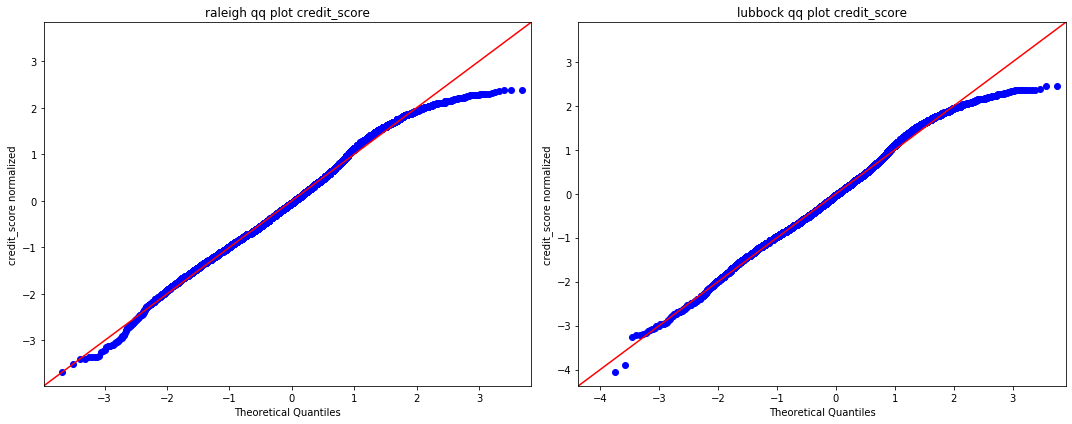

In [37]:
plot_qq([data.credit_score.dropna() for data in data_list],[title + " credit_score" for title in qq_title_list],"credit_score normalized")

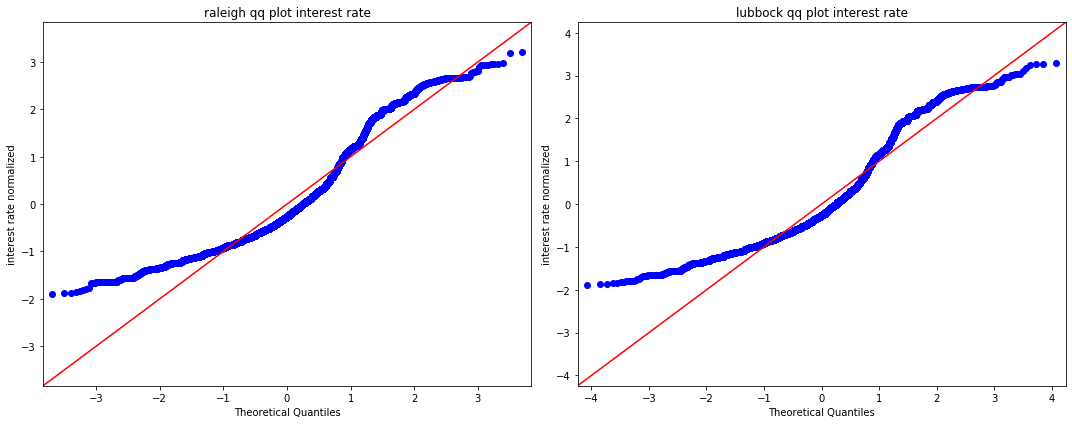

In [38]:
# int_rate_standard = [(data.int_rate - data.int_rate.mean())/data.int_rate.std() for data in data_list]
plot_qq([data.int_rate for data in data_list],[title + " interest rate" for title in qq_title_list],"interest rate normalized")

<span style="color:teal"> Both distributions seem to have a bad fit with a normal distribution, but credit score seems less bad</span>

### <span style="color:green">The activaiton plots, support our findings in the preveous section - Raleighs lower credit scores are seen also in activated loans. <br>In regards to `int_rate`, we can see that values lower than the mean have higher `int_rate` than the T-distribution, and after that it changes. This makes sense, when we looked at the density plot of `int_rate` we saw it was skewed right, and peaked to the left of the mean </span>

## Comparing activated populations 

Redo the above comparisons only for borrowes in Raleigh and Lubbock which accepted their loan offers

### <span style="color:green">If our assumption is true, we expect to see lower `credit_score` in Raleigh than in Lubbock since the flyer program attracted higher risk borrowers. <br>We did not see a visibale difference</span>

In [39]:
raleigh_activated_table = raleigh_table.loc[raleigh_table.offer_accepted]
lubbock_activated_table = lubbock_table.loc[lubbock_table.offer_accepted]

data_list_activated = [raleigh_activated_table,lubbock_activated_table]

Another method for comparing the distributions of two columns is by using a [q-q-plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). Repeat the comparisons of the above 5 features by creating the corresponding q-q-plots. You can either use the `seaborn_qqplot` package or [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot_2samples.html)'s implemetation, or write your own function that creates this plot. 

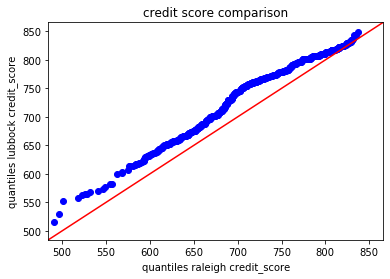

Raleigh median: 691.307193, Lubbock median: 691.491413


In [40]:
qqplot_2samples(raleigh_activated_table.credit_score,lubbock_activated_table.credit_score ,ylabel ='quantiles raleigh credit_score',xlabel ='quantiles lubbock credit_score',line='45')
plt.title("credit score comparison")
plt.show();
medians = [data.credit_score.mean() for data in df_list]
print("Raleigh median: {:f}, Lubbock median: {:f}".format(medians[0],medians[1]))

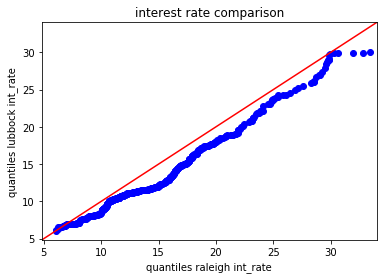

In [41]:
qqplot_2samples(raleigh_activated_table.int_rate,lubbock_activated_table.int_rate ,ylabel ='quantiles raleigh int_rate',xlabel ='quantiles lubbock int_rate', line='45')
plt.title("interest rate comparison")
plt.show();

In [42]:
raleigh_table.query('loan_amnt>=130000') # only one line outlier - we will not plot it

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,revs101,revs102,revs103,revs104,...,is_purpose_4,is_purpose_10,is_purpose_11,is_purpose_12,zip,monthly_debt,pre_loan_dti,zero_int_pti,zero_int_post_loan_dti,pti
1680,3d92c47347b3a7ec8322484ae1a9c6f274b738d9968e84...,4715c26135bad2c32d83e4f51e7e9eeb9aa98f8b4356fc...,200200.0,6.25,False,2018-01-11,-6,-6,-6,-6,...,False,False,False,False,83617,NaN,NaN,NaN,NaN,NaN


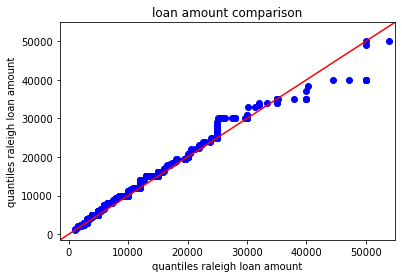

Raleigh median: 11730.960300, Lubbock median: 11712.100883


In [43]:
qqplot_2samples(raleigh_activated_table.query('loan_amnt<130000').loan_amnt,lubbock_activated_table.loan_amnt ,ylabel ='quantiles raleigh loan amount',xlabel ='quantiles raleigh loan amount', line='45')
plt.title("loan amount comparison")
plt.show();
medians = [data.query('loan_amnt<130000').loan_amnt.mean() for data in df_list]
print("Raleigh median: {:f}, Lubbock median: {:f}".format(medians[0],medians[1]))

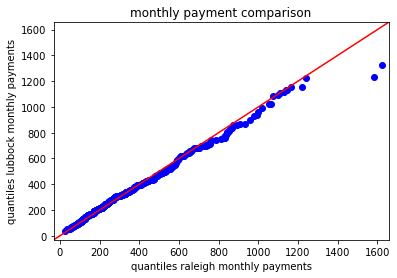

In [44]:
qqplot_2samples(raleigh_activated_table.query('loan_amnt<130000').monthly_pmt,lubbock_activated_table.monthly_pmt ,ylabel ='quantiles raleigh monthly payments',xlabel ='quantiles lubbock monthly payments', line='45')
plt.title("monthly payment comparison")
plt.show();

### <span style="color:green">Activated populations conclusions</span>

<span style="color:teal">It seems that, other than some outliers (very high or very low numbers) the distributions are similar.</span>

This method is also commonly used for visually comparing an observed distribution with a theoretical one (e.g. checking whether the values of a given column are normally distributed). One implementation is the [statsmodels.graphics.gofplots.qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) package which allows you to compare a given array with various distributions. 

Use this package to compare the distribution of credit score and interest rate in both town with a normal distribution.

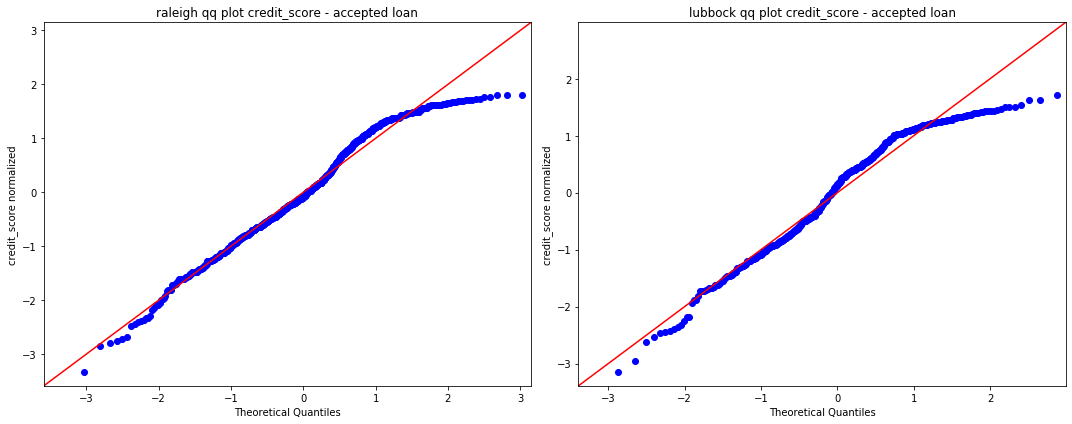

In [45]:
plot_qq([data.credit_score.dropna() for data in data_list_activated],[title + " credit_score - accepted loan" for title in qq_title_list],"credit_score normalized")

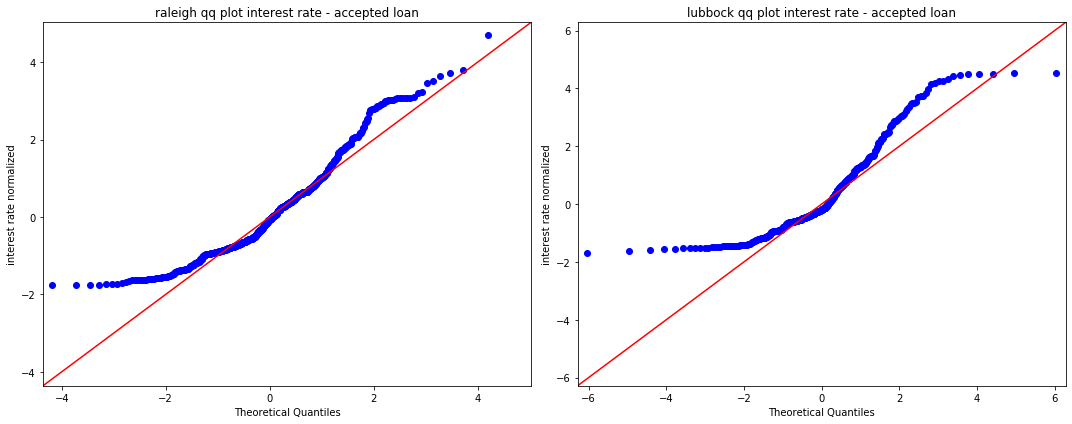

In [46]:
plot_qq([data.int_rate for data in data_list_activated],[title + " interest rate - accepted loan" for title in qq_title_list],"interest rate normalized")

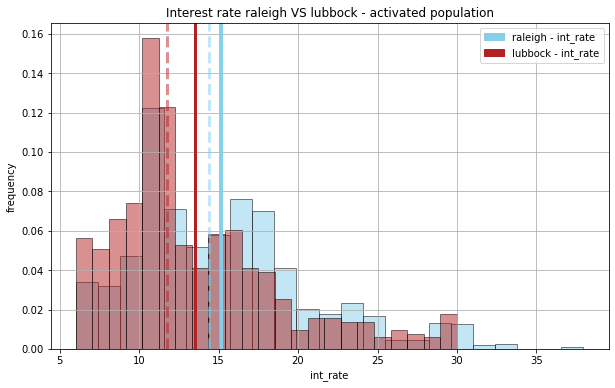

In [47]:
plot_density_histogram([df.int_rate for df in  data_list_activated],color_list, 'int_rate','frequency',\
                       [title + " - int_rate" for title in df_title_list], generla_title = "Interest rate raleigh VS lubbock - activated population")

So it seems that there are some differences between the two populations. Let's visualizes this using a KDE (kernel density estimation) smoothening. This is implemented (with Gaussian kernel), for example, in the [`seaborn.distplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) package, using the `kde=True` flag. Use this package to compare the distributions of `credit_score` and `int_rate` in the activated populations in Raleigh and Luboock. What do you observe?

No handles with labels found to put in legend.


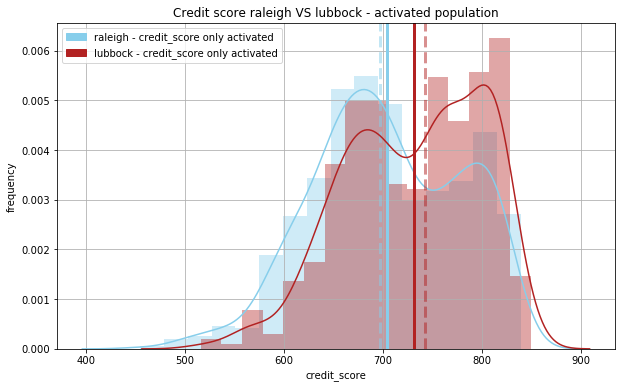

In [48]:
plot_density_histogram([data.credit_score for data in  data_list_activated],color_list, 'credit_score','frequency',\
                       [title + " - credit_score only activated" for title in df_title_list],generla_title = "Credit score raleigh VS lubbock - activated population",func_flag='kde')

### <span style="color:green">Again we can see that credit_score in Raleigh are lower</span>

No handles with labels found to put in legend.


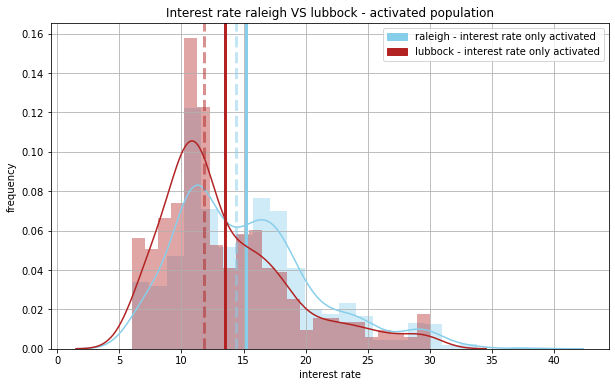

In [49]:
plot_density_histogram([data.int_rate for data in  data_list_activated],color_list, 'interest rate','frequency',\
                       [title + " - interest rate only activated" for title in df_title_list],generla_title = "Interest rate raleigh VS lubbock - activated population",func_flag='kde')

### <span style="color:green">In the qqplot we saw that interest rates in Raleigh are higher than the T-distribution until the mean, after that both Raleigh and Lubbock decrease. <br>There is one noticable difference at the tail, Raleigh continues to maintain higher `int_rate` as Lubbock decreases - visibly seen in the histogram plots.</span>

## Checking goodness of fit of the two distributions 

The question of whether the two activated populations are drawn from the same borrower population can also be tested using the Kolmogorov-Smirnov test. Setting your confidence level at 5%, and using the [scipy.stats.ks_2samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) package, formulate and perform a two-sample Kolmogorov-Smirnov test to check if the activated populations in Raleigh and Lubbock differ in terms of credit score.

In [50]:
stats.ks_2samp(raleigh_activated_table['credit_score'], lubbock_activated_table['credit_score'], alternative='greater')

KstestResult(statistic=0.1843668501883512, pvalue=7.408050297805243e-10)

In [51]:
stats.ks_2samp(raleigh_activated_table['int_rate'], lubbock_activated_table['int_rate'],alternative='less')

KstestResult(statistic=0.16842944074181396, pvalue=2.3669439257588386e-08)

### <span style="color:green">The null hypothesis of a two-sided KS test is that the two samples are drawn from the same distribution. Since our p-value is smaller than alpha=0.05, we reject the null hypothesis, thus we are able to say that the distribution of credit scores in raleigh and lubbock are different. </span>

## Soft clustering for detecting risk sub-populations

As you may have noted, for both credit score and interest rate, the distribution of values in Raleigh and Lubbock goes from being unimodal, for the general population, to bimodal, for the activated population. This is a commonly observed phenomenon and there are many speculations about why this happens. One possibility, is that the distribution of values in the activated population is in fact a mixture of two distinct borrower populations (e.g. risky and non-risky).

In this section we will use a Gaussian [mixture-model](https://en.wikipedia.org/wiki/Mixture_model) (GMM), which is a soft clustering model, in order to try to detect the existence of two borrower populations in among activated loans.

_Remark_: While credit score and offered interest rate are generally fair indicators of the risk of a loan, using them as markers for the risk of a loan is very simplistic and should not be done beyond exploratory analyses.

In fit to apply a mixture model to our data, we will use the [`sklearn.mixture.GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) package. Import this package.

In [52]:
from sklearn.mixture import GaussianMixture

Do the following:
* Initiate an instance of `GaussianMixture`
* Create the training dataset, which comprises of two columns of all credit scores and interest rates of **activated loans** in Lubbock **and** Raleigh, each row corresponding to a single loan
* fit your `GaussianMixture` instance to this data to detect a 2-component mixture

Refer to the packages [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) if you run into any trouble.

In [53]:
GMM = GaussianMixture(n_components=2)

In [54]:
training_set = pd.concat([raleigh_activated_table[['credit_score', 'int_rate']], lubbock_activated_table[['credit_score', 'int_rate']]], axis=0)
training_set.dropna(inplace=True)

In [55]:
GMM.fit(training_set)

GaussianMixture(n_components=2)

In [56]:
GMM.means_

array([[745.40792113,  11.75523794],
       [646.64095475,  20.56399451]])

In [57]:
GMM.weights_

array([0.684694, 0.315306])

Look at the center points of the two distributions you detected (using the packages `means_` attribute). Do the means of the distribution corroborate the hypothesis that the population correspond to different risk groups? (recall- higher risk borrowers tend to have lower credit scores and be offered higher interest rates).

#### <span style="color:green">We see that in the second group, the mean `credit_score` is lower and the mean `int_rate` is higher then the other group - it is reasonable to assume this is the riskier group</span>



Use your `GaussianMixture` instance to classify the activated population in Raleigh into two joint credit score-interest rate distributions. Create a scatter plot describing the credit score and interest rate of **all** loan offers in Raleigh, in which non-activated loans are colored  in one color, and the point representing activated loans are colored according to the distribution they are drawn from.

_Remark_: Since this plot would have a very large number of points, it might be a good idea to play with the values of `alpha` and `s`, so that the different groups would be more apparent.

In [58]:
labels_raleigh = GMM.predict(raleigh_activated_table[['credit_score', 'int_rate']])

risky_activated_raleigh = raleigh_activated_table[labels_raleigh == 1]
safer_activated_raleigh = raleigh_activated_table[labels_raleigh == 0]

proportion of risky population in Raleigh is: 0.3485221674876847
Means of the distributions:  [[745.40792113  11.75523794]
 [646.64095475  20.56399451]]
General population mean credit score  691.3071925225123
General population mean interest rate:  15.524284576888078


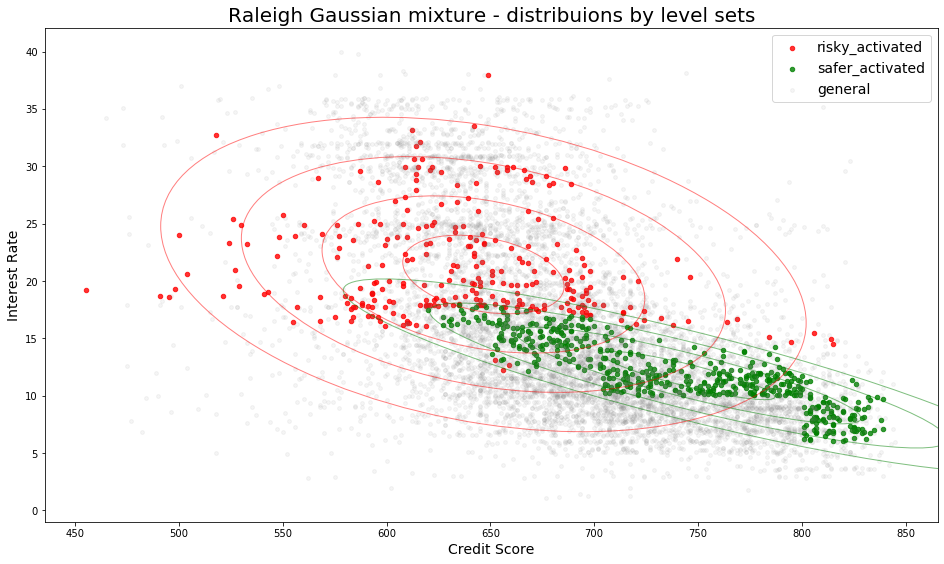

In [59]:
import itertools
from scipy import linalg 
import matplotlib as mpl

proportions_reisky = len(risky_activated_raleigh) / len(raleigh_activated_table)
print("proportion of risky population in Raleigh is:",proportions_reisky)
color_iter = itertools.cycle(['green', 'red'])
print("Means of the distributions: ",GMM.means_)
print("General population mean credit score ",raleigh_table['credit_score'].mean())
print("General population mean interest rate: ",raleigh_table['int_rate'].mean())


plt.figure(figsize=(16,20))
splot = plt.subplot(2, 1, 2)
for i, (mean, cov, color) in enumerate(zip(GMM.means_, GMM.covariances_, color_iter)):
    
    for i in range(1,5):
        v, w = linalg.eigh(cov)
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = i * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color, alpha=0.8, fill=False)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)
        
plt.scatter(risky_activated_raleigh['credit_score'], risky_activated_raleigh['int_rate'], alpha=.8, color='red', s=20, label='risky_activated')
plt.scatter(safer_activated_raleigh['credit_score'], safer_activated_raleigh['int_rate'], alpha=.8, color='green', s=20, label='safer_activated')
plt.scatter(x='credit_score', y='int_rate', data=raleigh_table[raleigh_table['offer_accepted'] == False], s=15, alpha=0.08, c='gray', label='general');
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.title('Raleigh Gaussian mixture - distribuions by level sets', fontsize=20)
plt.legend(fontsize=14);

Create the same scatterplot for the Lubbock table. Can you detect any differences between the two plots visually?

In [60]:
lubbock_activated_table.dropna(subset=['credit_score'],inplace=True)

In [61]:
labels_lubbock  = GMM.predict(lubbock_activated_table[['credit_score', 'int_rate']])

risky_activated_lubbock = lubbock_activated_table[labels_lubbock  == 1]
safer_activated_lubbock = lubbock_activated_table[labels_lubbock  == 0]

proportion of risky population in Raleigh is: 0.20121951219512196
Means of the distributions:  [[745.40792113  11.75523794]
 [646.64095475  20.56399451]]
General population mean credit score  691.4914128895184
General population mean interest rate:  15.505397526501767


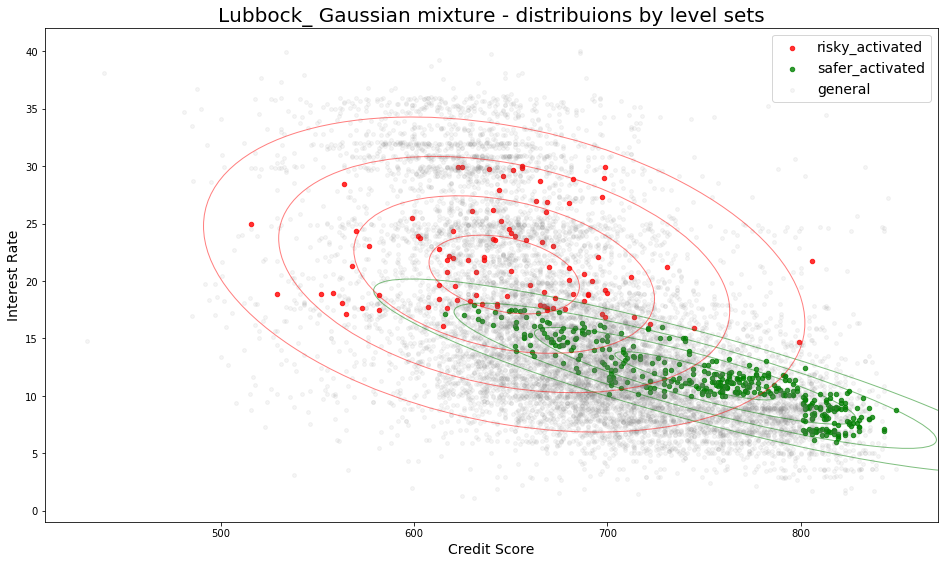

In [62]:
import itertools
from scipy import linalg 
import matplotlib as mpl


proportions_reisky = len(risky_activated_lubbock) / len(lubbock_activated_table)
print("proportion of risky population in Raleigh is:",proportions_reisky)
print("Means of the distributions: ",GMM.means_)
print("General population mean credit score ",lubbock_table['credit_score'].mean())
print("General population mean interest rate: ",lubbock_table['int_rate'].mean())
color_iter = itertools.cycle(['green', 'red'])

plt.figure(figsize=(16,20))
splot = plt.subplot(2, 1, 2)
for i, (mean, cov, color) in enumerate(zip(GMM.means_, GMM.covariances_, color_iter)):
    
    for i in range(1,5):
        v, w = linalg.eigh(cov)
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = i * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color, alpha=0.8, fill=False)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)
        
plt.scatter(risky_activated_lubbock['credit_score'], risky_activated_lubbock['int_rate'], alpha=.8, color='red', s=20, label='risky_activated')
plt.scatter(safer_activated_lubbock['credit_score'], safer_activated_lubbock['int_rate'], alpha=.8, color='green', s=20, label='safer_activated')
plt.scatter(x='credit_score', y='int_rate', data=lubbock_table[lubbock_table['offer_accepted'] == False], s=15, alpha=0.08, c='gray', label='general');
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.title('Lubbock_ Gaussian mixture - distribuions by level sets', fontsize=20)
plt.legend(fontsize=14);

\* **Bonus** Create a function that adds some of the level sets of the underlying Gaussian distiburions to the scatterplots above. Recreate the scatter plots with level sets at 1,2,3 and 4 standard deviations from the mean.


We left only the drawing with the std circles since it better explains the data making the other scatter redundent

Addition - in order to check the sifnificance of the difference in proportions we added yet another proprotions test based on the algorithm clsutering.

In [63]:



stats.ks_2samp(raleigh_activated_table['credit_score'], lubbock_activated_table['credit_score'], alternative='two-sided')

KstestResult(statistic=0.18344747486883736, pvalue=1.7121417617005363e-09)

# Infrernce from a regression model

So far, our analysis of risk groups has been exploratory and did not include any computation of return or actual assesment of the risk of a group. Also, our partition of the data into two risk groups was partially based on credit scores, which are imperfect predictors of the risk of a loan. 

In this section, we will attempt a more analytic approach to classifying risk populations. Before starting our analysis, we should decide on a criterion for a sub-population to be riskier than another. Throughout this section, we will use the sub-population's portfolio's yield as this criterion; that is- we'll consider one sub-population as riskier than another if the former's portfolio has a significantly lower yield than the latter.

## Comparing high-risk and low-risk subgroups

To begin with, we need to decide on our classification of high-risk and low-risk subgroups. In the previous section we relied on the borrowers' credit scores and offered interest rates for clasifying these subgroups; however, these metrics have some obvious problems. For example, many borrowers have no credit scores, and could not be classified using it. Also, interest rate not a direct assessment of the risk level of the client, but rather a reflection of the risk assessed by the issuing company.

Instead, we'll attempt to use an internally developed charge-off (CO) classifier, called the `PPCC21 model`. This model is a machine learning model, which attempts to predict whether a given loan is likely to default (or, synonymously- charge off). Since a charge-off event has a very negative effect on the yield of a portfolio, we will consider the predicted CO population as the high-risk group and non-CO population as the low-risk population. However, this statement is not clear-cut and needs to be tested.

### Analyzing historic payments data

In this section, we will test our hypothesis that CO populations are significantly riskier (and therefore produce significantly lower yields) than no-CO population. In order to do so, we will need complete payments data from historic loans. Let's start by uploading our data. 

In the following path, you will find payment records on ~470,000 loans from 2017Q2.

In [64]:
payments2017Q2=pd.read_parquet(os.path.join(ASSIGNMENT2_DATA,"TU_agg_payments.parquet")) 

The payments table contains aggregated payments; that is- the column `agg_paid{i}` contains the amount paid by the client up to the i-th month on book (MOB). Add new columns to the table (one for each mob), containing the amount paid by the client _at_ mob i.

In [65]:
new_columns_names = ['paid_mob1']
payments2017Q2["paid_mob1"] = payments2017Q2['agg_paid1']

for i in range(1,35):
    new_columns_names.append("paid_mob" + str(i+1))
    prev_month = "agg_paid" + str(i)
    current_month = "agg_paid" + str(i+1)
    payments2017Q2[new_columns_names[i]] = payments2017Q2[current_month] - payments2017Q2[prev_month]

new_columns_names.insert(0,'loan_amnt')

In [66]:
payments2017Q2.head()

,account_id,co_mob,int_rate,monthly_pmt,loan_amnt,term,agg_paid1,agg_paid2,agg_paid3,agg_paid4,...,paid_mob26,paid_mob27,paid_mob28,paid_mob29,paid_mob30,paid_mob31,paid_mob32,paid_mob33,paid_mob34,paid_mob35
0,000066de88925e1fe302bc288ad33a8c0e852e74aa51fd...,NaN,17.27,125.0,5000.0,60.0,125.0,250.0,375.0,500.0,...,125.0,3390.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000067346de3d6df0d7e9248364184edd63227f50d8754...,NaN,14.32,103.0,3000.0,36.0,103.0,206.0,309.0,412.0,...,103.0,103.0,874.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000c634b1c49508ee3344d64fbe9560970d42ff6cdf8d...,NaN,32.60,158.0,3600.0,36.0,158.0,316.0,474.0,632.0,...,158.0,158.0,158.0,1122.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0000c95ea96bc86565526c262eaba3b7f69f9ae024ea98...,NaN,18.41,392.0,15300.0,60.0,391.9,783.9,1175.8,1567.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000e23adbe7162ac902b6fe44e6876d9106a13ad4b09a...,NaN,13.63,136.0,4000.0,36.0,136.0,272.0,408.0,544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Compute the [internal revenue rate (IRR)](https://www.investopedia.com/terms/i/irr.asp) of each loan. Use the [`numpy_financial.irr`](https://numpy.org/numpy-financial/latest/irr.html) function.

In [67]:
import numpy_financial as npf

temp_for_IRR = payments2017Q2[new_columns_names]
temp_for_IRR['loan_amnt'] *= -1

In [68]:
payments2017Q2['IRR_per_loan'] = temp_for_IRR.apply(lambda x: npf.irr(x), axis=1)

Are there any nan values in your irr column? Investigate these and decide how to handle them.

In [69]:
payments2017Q2['IRR_per_loan'].isnull().sum()

399

<span style="color:teal">Oh no! There are nans in the irr column! If we look at these lines, we'll see that these happens when no payments were made _at all_! We'll fill these nans with -1, since these mean that the loan is a loss of a 100%.
</span>

In [70]:
payments2017Q2['IRR_per_loan'].fillna(-1, inplace=True)

We added a column for `yearly_IRR` - it is asked below

In [71]:
payments2017Q2['yearly_IRR'] = ((1 + payments2017Q2['IRR_per_loan'])**12)-1

### Running a model

Import the PPCC21 model:

In [72]:
from pagayapro.models.PPCC21Model import PPCC21Model

The model comes trained out-of-the-box (on a set of ~160,000 loans from 2016), and has two attributes:
* `predict` - which returns T/F predictions on whether or not a loan is predicted to charge-off (True $
\iff$ loan will CO); and
* `predict_proba` - which return the predicted probability of each loan to CO and to not CO.

(it also has a `fit` attribute which we will not use). 

Both `predict` and `predict_proba` are able to predict on any dataframe with suitable features, regardless of their order or other columns in the df.

Create an instance of your model

In [73]:
model = PPCC21Model()

In order to predict whether a loan will CO or not, you will also need to add TU feature for you loans. To do so, read the 2017Q2 feature file (path below) and merge it with the payments table, to create an enriched payments table. _Note_: the merge operation may take a while. Feel free to try to improve it.

In [74]:
features2017Q2= pd.read_parquet(os.path.join(ASSIGNMENT2_DATA,"TU2017Q2_features.parquet"))

### <span style="color:green">We will sort each data frame by index and concatenate the data frames </span>


In [75]:
data_payments = payments2017Q2.sort_index()

In [76]:
data_enriched = features2017Q2.sort_index().copy()

In [77]:
# add each column to the fetures data frame
for column in data_payments.columns:
    data_enriched[column] = data_payments[column].values

In [78]:
data_enriched.IRR_per_loan.mean()

-0.004266782281630044

In [79]:
len(data_enriched.columns)

2572

In [80]:
len(payments2017Q2.columns) + len(features2017Q2.columns)

2576

In [81]:
data_enriched.isna().sum(axis=0)

revs101         0
revs102         0
revs103         0
revs104         0
revs105         0
               ..
paid_mob33      0
paid_mob34      0
paid_mob35      0
IRR_per_loan    0
yearly_IRR      0
Length: 2572, dtype: int64

Use the model to get a prediction for each row of your `enriched_features` dataframe.

In [82]:
prediction = model.predict(data_enriched)

In [83]:
prediction

array([0, 0, 1, ..., 0, 0, 0])

### Some model validations

Let us validate the model's accuracy. What percentage of loans in the `enriched_payments` data are charged-off? (note: a loan is COed iff it has a reported CO-mob).

In [84]:
precentage_of_co_loans = payments2017Q2.co_mob.notna().mean()
print(precentage_of_co_loans)

0.08353179456151869


What percentage of loans are predicted to be COed by the model?

In [85]:
precentage_predicted_by_model = prediction.mean()
precentage_predicted_by_model

0.08198057869148612

Use the `sklearn.metrics.accuracy_score` to get the models accuracy score.

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
co_true_values = data_enriched.co_mob.notna().astype(int)

In [88]:
accuracy = accuracy_score(prediction,co_true_values)

In [89]:
print("the model accuracy is:", accuracy)

the model accuracy is: 0.8660054153096209


As you see, there is room for improvement in the model's ability to predict CO. However, there is reason to believe that it might be useful for more general risk prediction, which we will try to verify here. In what follows, we call the group the model predicted as CO by predicted-CO, and the second group by predicted-non-CO. Our criterion for the risk of a group would be a significant difference in average IRR for this group.

### Visualizing IRR

Create a scatter plot depicting the IRR of a given loan vs its interest rate, and color each group (predicted-CO and predicted-non-CO) with a different color. What phenomena can you detect from the scatterplot? 

_Note_. The IRR is given in monthly terms, while interest rate is usually given in annual term. The standard formula for passing from a mothly rate to an anuual term is
$\text{annual rate}=\left(1+\text{monthly rate}\right)^{12}-1.$ 
A very common approximation is to simply multiply the monthly rate by 12.

In [90]:
data_enriched

,revs101,revs102,revs103,revs104,revs105,revs106,revs107,revs108,revs109,revs110,...,paid_mob28,paid_mob29,paid_mob30,paid_mob31,paid_mob32,paid_mob33,paid_mob34,paid_mob35,IRR_per_loan,yearly_IRR
id,,,,,,,,,,,,,,,,,,,,,
000066de88925e1fe302bc288ad33a8c0e852e74aa51fd955bd5fd9923e67e87,146,367,1377,3352,0,1112,609,646,208,456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014392,0.187048
000067346de3d6df0d7e9248364184edd63227f50d87549ca39299fc1482fa59,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,874.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011779,0.150871
0000c634b1c49508ee3344d64fbe9560970d42ff6cdf8d8f8d92bfe5023f0e96,83,588,774,263,37,61,98,60,98,192,...,158.0,1122.5,0.0,0.0,0.0,0.0,0.0,0.0,0.026902,0.375139
0000c95ea96bc86565526c262eaba3b7f69f9ae024ea98f5525d4ac9f188edd2,11131,17453,3738,1716,1867,621,2340,7134,1661,2902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015342,0.200458
0000e23adbe7162ac902b6fe44e6876d9106a13ad4b09a85a5b3ff437b00a52a,402,0,682,29,245,610,708,324,43,67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011358,0.145144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffeca7e8ef5a9435e65eb86969ee0b754737b413adb96e9327fbf7a8944a180,1191,94,611,409,257,38,36,239,154,147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029059,0.410203
ffff2df1ed92edd89247586b7b7c017ab077cd6c0db17991a104876e011b311b,41,629,11,12,12,13,15,51,14,16,...,231.0,230.9,1549.2,0.0,0.0,0.0,0.0,0.0,0.010702,0.136263
ffffa17cbb3ee3f42c23a14bcf80074cbe54688f9786ae636e36bcc27f4924f3,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007394,0.092431


In [91]:
data_enriched['model_prediction_co'] = prediction

model_co_population = data_enriched.query('model_prediction_co == 1')
model_no_co_population = data_enriched.query('model_prediction_co == 0')

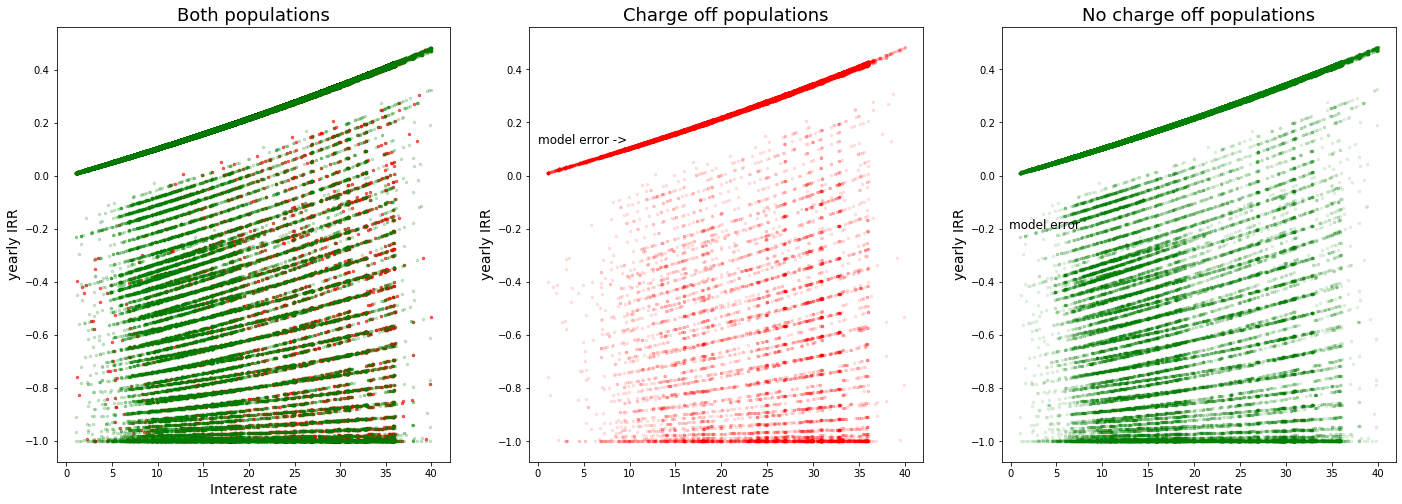

In [92]:
fig, axs = plt.subplots(1,3,figsize=(24,8))
# axs.flat
axs[0].scatter(model_co_population.int_rate, model_co_population.yearly_IRR, s=6,alpha=0.6,c='red')
axs[0].scatter(model_no_co_population.int_rate, model_no_co_population.yearly_IRR,s=6,alpha=0.2,c='green')
axs[0].set_title("Both populations",fontsize=18)
axs[1].scatter(model_co_population.int_rate, model_co_population.yearly_IRR,s=6,alpha=0.1,c='red')
axs[1].set_title("Charge off populations",fontsize=18)
axs[1].annotate('model error ->', xy=(0, 0.01), xytext=(0,0.12), fontsize=12)
axs[2].scatter(model_no_co_population.int_rate,model_no_co_population.yearly_IRR,s=6,alpha=0.1,c='green')
axs[2].set_title("No charge off populations",fontsize=18)
axs[2].annotate('model error', xy=(0.2, -0.2), xytext=(-0.2,-0.2), fontsize=12)
for ax in axs:
    ax.set_ylabel("yearly IRR",fontsize=14)
    ax.set_xlabel("Interest rate",fontsize=14)
plt.show()

<span style="color:teal">Predicted CO points seem to cluster towards higher interest rates. As the irr decreases, the proportion of CO seems to increas, where the bottom line (yield = -1).

Line formation is also interesting- why?
</span>

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_enriched.int_rate,100* data_enriched.yearly_IRR,s=10,alpha=0.5,c=data_enriched.fillna(36)['co_mob'])
hexbins = ax.hexbin(data_enriched.int_rate, data_enriched.yearly_IRR, C=data_enriched.fillna(36)['co_mob'], 
                 bins=36, gridsize=50)

plt.legend(handles=[mpatches.Patch(color='black', label='1'),
                    mpatches.Patch(color='yellow', label='36')], 
                    loc='lower right', edgecolor='black', framealpha=1)

cb = fig.colorbar(hexbins, ax=ax)
cb.set_label('Color Scale by charge off month')
plt.xlabel('Interest Rate')
plt.ylabel('Yearly IRR')
plt.title('Interest Rate VS Yearly IRR')
plt.legend()
plt.show()

### <span style="color:green">After plotting `yearly_irr` we can see that loans with no charge off, have lower `int_rate`. </span>

What is the average IRR for the predicted-CO group? what is the average IRR for the predicted-non-CO group?

In [ ]:
predicted_co_avarage_irr = model_co_population.IRR_per_loan.mean()
predicted_non_co_avarage_irr = model_no_co_population.IRR_per_loan.mean()

co_avg = data_enriched.loc[data_enriched.co_mob.isnull() == False].IRR_per_loan.mean()
no_co_avg = data_enriched.loc[data_enriched.co_mob.isnull() == True].IRR_per_loan.mean()
yearly_IRR = data_enriched.yearly_IRR.mean()
model_yearly_irr = model_no_co_population.yearly_IRR.mean()

print("Model prediction co_avarage_irr: {:.3f}, real co_avg: {:.3f}".format(predicted_co_avarage_irr, co_avg))
print("Model prediction non_co_avarage_irr: {:.3f}, real no_co_avg {:.3f}".format(predicted_non_co_avarage_irr, no_co_avg))

print('Overall we got {:.3f} yearly IRR, compared to the yearly IRR we should have gotten by the model: {:.3f}'.format(yearly_IRR, model_yearly_irr))

_Remark_. The average IRR is usually not the best estimator for the IRR of a portfolio, as it can be very different from the total IRR. However, considering averages allows us to apply statistical tool, which gives way for analyses; specifically, using linear regression.

_Another remark_. A beter approximation for the IRR of a portfolio can be achieved using a weighted average instead of an ordinary average (e.g. weigheted by the loan's amount). Feel free to try to adapt the current method for weighted averages.

## Statistical test for comparing averages

As explained in the notion page, the averages of two population of a sample can be compared using infrernce from a linear regression model. Indeed, the averages of the two subsets are different if and only if the slope of the regression line $y\sim mx+n$, where $x=1$ on one subset and $0$ otherwise, is non-zero.

Use the [statsmodels.api.OLS](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) package in order to create a regression model, with IRR as the dependent variable and a binary variable describing membership to either of the CO-groups as the independent variable. 

In [ ]:
data_enriched['const'] = 1
x = data_enriched[['model_prediction_co','const']]
y = data_enriched['IRR_per_loan']
res = sm.OLS(y,x).fit()

In [ ]:
print(res.summary())

Create a sctterplot of the dependent vs the independent variable of the model, and add the regression line to the plot. In addition, it is recommended that yoy add lines indicating the confidence region of your regression line (you can use the [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) package or some of the additional functionality of `statsmodels.api.OLS` package).

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(data_enriched.model_prediction_co, data_enriched.IRR_per_loan,fit_reg=True, x_ci=50);
plt.axhline(y=0, color='r', linestyle='-')
plt.annotate("y=0 line in red",xy=(0,0.05),xytext=(0,0.05),c='r')
print('Regression line slope: -0.0218')

Is the slope of the regression line significantly different from zero? What can you conclude from this result regarding the difference in risk levels between the two groups?

 ### <span style="color:green">The slope is not zero, it is near zero - with p_valuw zero as seen in the test </span>

<span style="color:teal">
The two means are different to a very high degree of significance. However, the confidence interval is very wide, indicating a large margin of error, and the actual difference between the means is very small (under 0.3%), so it is unclear whether there is a good enough separation between the groups.
</span>

### Controlling for interest rate

To check whether the difference in risk between the two groups is explained by the different interest rate, fit a new regression model, now with both model score and interest rate as covariates, and check whether the risk level is different between the two groups when controlling for interest rate.

In [ ]:
# add interest rate to the 
x = data_enriched[['int_rate','model_prediction_co','const']] 
y = data_enriched['IRR_per_loan']
res = sm.OLS(y,x).fit()
data_enriched_no_co = data_enriched.query('model_prediction_co == 0')
data_enriched_co = data_enriched.query('model_prediction_co == 1')

Create two overlaying scatterplots of IRR vs interest rate, according to the different groups, and add the regression line associated to each group the the corresponding scatterplot. Can you detect a visible difference between the two groups?

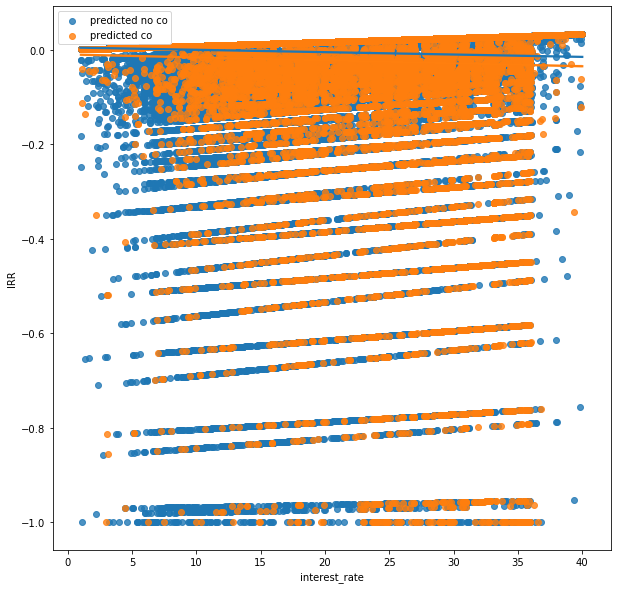

In [99]:
plt.figure(figsize=(10,10))
sns.regplot(data_enriched_no_co.int_rate,data_enriched_no_co.IRR_per_loan, fit_reg=True,label='predicted no co');
sns.regplot(data_enriched_co.int_rate, data_enriched_co.IRR_per_loan, fit_reg=True,label='predicted co');
plt.legend()
plt.ylabel('IRR')
plt.xlabel('interest_rate');

<span style="color:teal">
    Some difference, but very slight
    </span>

Check the model's results summary to see if the coefficient related to model-score group is significantly different from zero.

In [100]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           IRR_per_loan   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1567.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:35:46   Log-Likelihood:             4.7821e+05
No. Observations:              466086   AIC:                        -9.564e+05
Df Residuals:                  466083   BIC:                        -9.564e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
int_rate               -0.0005   1

What is your conclusion? Is the risk level between the two groups different when interest rate is controlled for?

Can you rely on the PPCC21 model score as an indicator for risk level?

<span style="color:teal">
        The model significantly separates between the two risk groups, but the separation seems to be ineffective
</span>

## Comparing proportions of the different groups in Raleigh and Lubbock

In order to compare the risk levels of the activated populations in Raleigh and Lubbock, start by adding a model prediction to each activated loan of the two tables. You have already added the necessary TU feature to the tables in a previous section, so all that's left is to run the model on each of them get the necessary predictions, and add these as a column to the table.

In [101]:
raleigh_model = PPCC21Model()
raleigh_activated_table['model_prediction_co'] = raleigh_model.predict(raleigh_activated_table)

In [102]:
lubbock_model = PPCC21Model()
lubbock_activated_table['model_prediction_co'] = raleigh_model.predict(lubbock_activated_table)

Run a proprotions test in order to check if the proportion of risky borrowers is significantly larger in Raleigh than in Lubbock.

In [103]:
lubbock_activated_table.model_prediction_co.sum()

17

In [104]:
raleigh_activated_table.model_prediction_co.value_counts(normalize=True)

0    0.940887
1    0.059113
Name: model_prediction_co, dtype: float64

In [105]:
# Try and reject H_0
from statsmodels.stats.proportion import proportions_ztest
sample_success_raleigh = raleigh_activated_table.model_prediction_co.sum()
sample_success_lubbock = lubbock_activated_table.model_prediction_co.sum()
sample_size_raleigh = raleigh_activated_table.model_prediction_co.count()
sample_size_lubbock = lubbock_activated_table.model_prediction_co.count()

stat, p_value = proportions_ztest(count=[sample_success_raleigh,sample_success_lubbock], nobs=[sample_size_raleigh,sample_size_lubbock], alternative='larger')

In [106]:
print('since p value is {:.2f} > aplha (=0.05), we cannt reject H0'.format(p_value))

since p value is 0.02 > aplha (=0.05), we cannt reject H0


What do you conclude regarding the risk level of the activated population in each town?

<span style="color:teal"> 
    We cannot reject the null hypothesis that the proportion of risky borrowers in Raleigh is smaller or equal to the one in Lubbock.
    </span>

# Analysis using current payments

One more strategy for analyzing the risk level of a current portfolio is to analyze the number of late payments in a given period. Generally speaking, since loans with late or partial payments are indicative of the borrower's ability to repay the loan, we consider portfolios with higher proportions of such payments as being riskier.

We'll call a loan late at mob i if its payment at this month is less then 95% of the amount that was supposed to be paid on that month.

We have payments reports for the first six months of each loan issued before 2020 in Raleigh and Lubbock. These are available in the following directories:

In [107]:
raleigh_current_pmts= pd.read_parquet(os.path.join(ASSIGNMENT2_DATA, "payment_report_RL.parquet"))
lubbock_current_pmts= pd.read_parquet(os.path.join(ASSIGNMENT2_DATA, "payment_report_LB.parquet"))

The payments file come in the form of tradelines; that is- each row describe a single payment made towards a give loan,

Create new tables in which every loan id appears in a unique line, along with its features (`int_rate`, `loan_amnt`, `monthly_pmt` etc), and there is a column `pmt_{i}` for each `i`=1,..,6 which contains the payment made at mob `i`. Use the [pandas.DataFrame.pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) method in order to perform the last part.

In [108]:
raleigh_pmts = raleigh_current_pmts.pivot_table(index=['id','monthly_pmt', 'int_rate', 'loan_amnt'], columns=['pmt_num'], values='payment')
raleigh_pmts.columns = ['pmt_1', 'pmt_2', 'pmt_3', 'pmt_4', 'pmt_5', 'pmt_6']
raleigh_pmts.reset_index(level=['monthly_pmt', 'int_rate', 'loan_amnt'], inplace=True)

In [109]:
lubbock_pmts = lubbock_current_pmts.pivot_table(index=['id','monthly_pmt', 'int_rate', 'loan_amnt'], columns=['pmt_num'], values='payment')
lubbock_pmts.columns = ['pmt_1', 'pmt_2', 'pmt_3', 'pmt_4', 'pmt_5', 'pmt_6']
lubbock_pmts.reset_index(level=['monthly_pmt', 'int_rate', 'loan_amnt'], inplace=True)

Add a column to the dataframes above, containing the number of late months of the corresponding loan (that is- the number of months in which the amount paid is less then 95% of the monthly payment.

In [110]:
raleigh_pmts[['pmt_1','pmt_2', 'pmt_3', 'pmt_4', 'pmt_5', 'pmt_6']]

,pmt_1,pmt_2,pmt_3,pmt_4,pmt_5,pmt_6
id,,,,,,
00685932d60700fec101fa049973901b7f9f90542e25cbb25a2b14695bc92e18,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
00e0ec2e722b92056d041e58857390646a5dbc7acbf38649e328a056c029a78f,460.000000,402.281177,460.000000,460.000000,460.000000,460.000000
0115f1c885feaf2db478ff5ec9dbb06f4a6fa4ed9f76bd12cb7eb49e8c097ed3,360.294165,360.294165,360.294165,360.294165,514.000000,360.294165
02b7bed357dd2a2ec49245c73614b7b57fb0474d1e4e2166c92d442bdd4c0683,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
02cec8badffe2185cd0012a8b001ea9c40ae080dfb4d2a2e8a18d27cc2662d2b,443.000000,436.843644,443.000000,443.000000,436.843644,443.000000
...,...,...,...,...,...,...
fd054b36db57eaf3bd380bcd3b4e764aeb5862822750302d24f8e3757fe2937c,260.059530,260.059530,260.059530,281.000000,281.000000,281.000000
fd3971e760635ec8aeb6d6a6c6a79224ba7779e1ce06e26b19ea6c18672dc828,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
fdf5e3978ece0e43f99ecd8e6c91b55b7e5426f88151fe08523b7c67c30dcde7,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000


In [111]:
raleigh_pmts['num_of_late_pmt'] = raleigh_pmts.apply(lambda x: x[['pmt_1','pmt_2', 'pmt_3', 'pmt_4', 'pmt_5', 'pmt_6']] < x['monthly_pmt']*0.95, axis=1).sum(axis=1)

In [112]:
lubbock_pmts['num_of_late_pmt'] = lubbock_pmts.apply(lambda x: x[['pmt_1','pmt_2', 'pmt_3', 'pmt_4', 'pmt_5', 'pmt_6']] < x['monthly_pmt']*0.95, axis=1).sum(axis=1)

In [113]:
raleigh_pmts

,monthly_pmt,int_rate,loan_amnt,pmt_1,pmt_2,pmt_3,pmt_4,pmt_5,pmt_6,num_of_late_pmt
id,,,,,,,,,,
00685932d60700fec101fa049973901b7f9f90542e25cbb25a2b14695bc92e18,254.0,17.97,10008.0,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,0
00e0ec2e722b92056d041e58857390646a5dbc7acbf38649e328a056c029a78f,460.0,13.47,20000.0,460.000000,402.281177,460.000000,460.000000,460.000000,460.000000,1
0115f1c885feaf2db478ff5ec9dbb06f4a6fa4ed9f76bd12cb7eb49e8c097ed3,514.0,13.18,22500.0,360.294165,360.294165,360.294165,360.294165,514.000000,360.294165,5
02b7bed357dd2a2ec49245c73614b7b57fb0474d1e4e2166c92d442bdd4c0683,267.0,12.33,8000.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,0
02cec8badffe2185cd0012a8b001ea9c40ae080dfb4d2a2e8a18d27cc2662d2b,443.0,11.81,20000.0,443.000000,436.843644,443.000000,443.000000,436.843644,443.000000,0
...,...,...,...,...,...,...,...,...,...,...
fd054b36db57eaf3bd380bcd3b4e764aeb5862822750302d24f8e3757fe2937c,281.0,15.93,8000.0,260.059530,260.059530,260.059530,281.000000,281.000000,281.000000,3
fd3971e760635ec8aeb6d6a6c6a79224ba7779e1ce06e26b19ea6c18672dc828,209.0,21.29,5525.0,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,0
fdf5e3978ece0e43f99ecd8e6c91b55b7e5426f88151fe08523b7c67c30dcde7,119.0,11.99,5350.0,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,0


In [114]:
lubbock_pmts

,monthly_pmt,int_rate,loan_amnt,pmt_1,pmt_2,pmt_3,pmt_4,pmt_5,pmt_6,num_of_late_pmt
id,,,,,,,,,,
001046cb99ae36567910bdd6fd907622cdc8aefb1689d66339fcb59353be46e2,393.0,6.68,20000.0,393.000000,393.000000,393.0,393.0,393.000000,393.0,0
02000bad7a4d8ce7e3571dcf94b248e289fee3248f63f3d9a968be1169f53063,864.0,14.78,25000.0,864.000000,864.000000,864.0,864.0,864.000000,864.0,0
020c8cd76f466d5f4e4c3d03d49d8a1d96248772c6ba7490b7fa431305f8066e,213.0,10.11,10000.0,203.824649,203.824649,213.0,213.0,203.824649,213.0,0
02971dc39fec6fd26ea969cc421e711f83cf9f344dbf1b0fe203ce23e067de8e,202.0,20.78,7500.0,202.000000,202.000000,202.0,202.0,202.000000,202.0,0
03d7f92a156e14794004fcc295b04cfddba3fb28c804c53086785553229a3a25,164.0,11.12,5000.0,164.000000,164.000000,164.0,164.0,164.000000,164.0,0
...,...,...,...,...,...,...,...,...,...,...
fab0d827933566f6db0c237af0646e2ec92075c428b0f13852f2e413b41e8dca,333.0,11.91,15000.0,333.000000,333.000000,333.0,333.0,333.000000,333.0,0
fae2afcd18bec5f8bb2c25db4bb75f12104cc283b9480cb740e8c431a0b51ab4,568.0,12.90,25015.0,568.000000,568.000000,568.0,568.0,568.000000,568.0,0
fbdd442f2637e24a25f2c2222419231b5751d5a41ade0867ce26b10332b56124,750.0,7.98,37000.0,750.000000,750.000000,750.0,750.0,750.000000,750.0,0


For each number n=0,..,6 compute the percentage of loans each of the above table that are late by n months. Plot these distributions (e.g. using the [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function). Can you detect a visible difference between the two tables?

In [115]:
show_proportions = pd.DataFrame(raleigh_pmts.groupby('num_of_late_pmt').size() / len(raleigh_pmts), columns=['raleigh_proportions'])
show_proportions['lubbock_proportions'] = lubbock_pmts.groupby('num_of_late_pmt').size() / len(lubbock_pmts)
show_proportions

,raleigh_proportions,lubbock_proportions
num_of_late_pmt,,
0,0.788280,0.846154
1,0.020794,0.035256
2,0.039698,0.041667
3,0.037807,0.025641
4,0.043478,0.019231
5,0.041588,0.022436
6,0.028355,0.009615


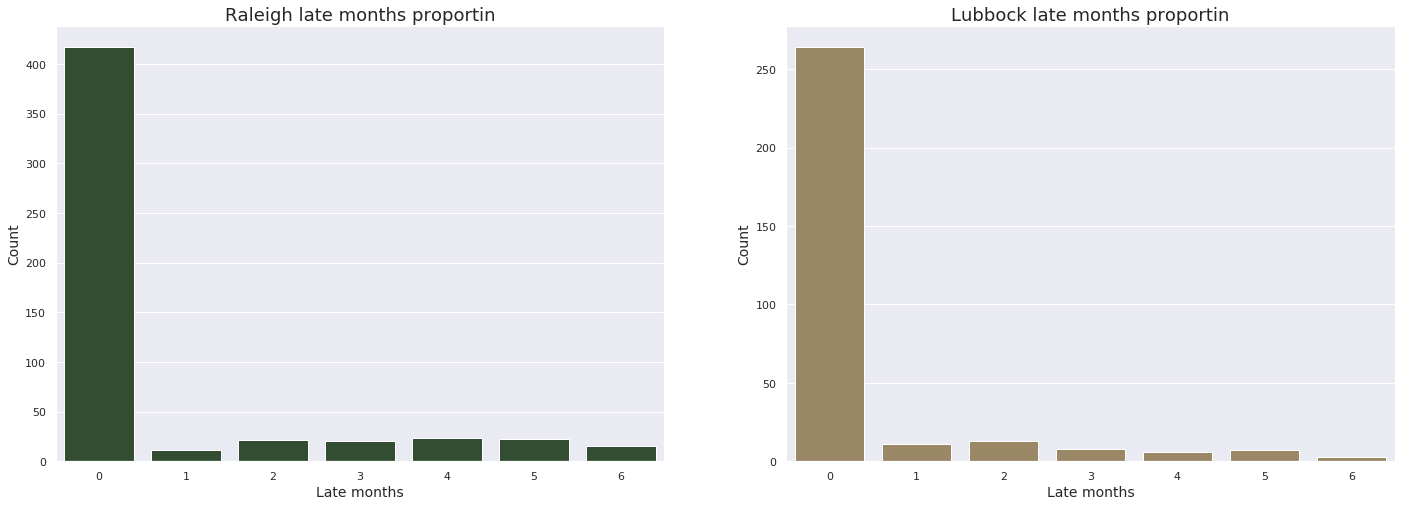

In [154]:
fig, axs = plt.subplots(1,2,figsize=(24,8))
# axs.flat
sns.countplot(x='num_of_late_pmt', data=raleigh_pmts, saturation=.2, color='green', label='Raleigh',ax=axs[0]);
axs[0].set_title("Raleigh late months proportin",fontsize=18)
sns.countplot(x='num_of_late_pmt', data=lubbock_pmts, saturation=.2, color='orange', label='Lubbock',ax=axs[1]);
axs[1].set_title("Lubbock late months proportin",fontsize=18)

for ax in axs:
    ax.set_ylabel("Count",fontsize=14)
    ax.set_xlabel("Late months",fontsize=14)
plt.show()

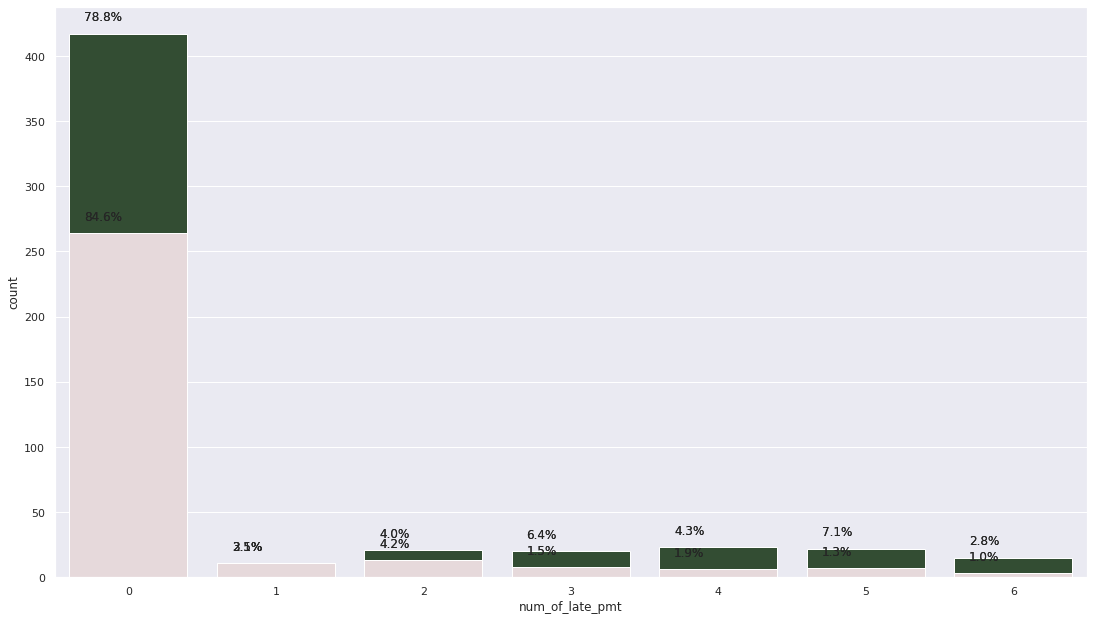

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
arr = []
def get_height(p):
    arr.append(1)
    total = len(raleigh_pmts)
    if len(arr) % 2 == 0:
        total = len(lubbock_pmts)
    return p.get_height() * 100 / total
g = sns.countplot(x='num_of_late_pmt', data=raleigh_pmts, saturation=.2, color='green', label='Raleigh');
g2 = sns.countplot(x='num_of_late_pmt', data=lubbock_pmts, saturation=.2, color='pink', label='Lubbock');
for p in ax.patches:
    g.annotate('{:.1f}%'.format(get_height(p)), (p.get_x()+0.1, p.get_height()+10))
for p in ax.patches:
    g2.annotate('{:.1f}%'.format(get_height(p)), (p.get_x()+0.1, p.get_height()+10))

So we've seen by now that there is a detectable difference between the frequencies of late payments in the two towns, but how do the two of them compare with the general population?

In order to get a benchmark for the number of late payments at each mob in the general population, we'll also draw payment reports from the general population. To this end, you will find payments reports for the period 2017-04--2020-12, taken from the Upgrade platform, in the following path:

In [117]:
upgrade_payments = pd.read_parquet(os.path.join(ASSIGNMENT2_DATA, "upgrade2020_payments.parquet"))

Note that these files are also formatted as tradelines, with the amount paid at each month recorded in the column `paid`, and should be reformatted so that all payments of a given loan appear in a single line using the `pandas.DataFrame.pivot` method. Do this now- create a new table in which every loan appears in a single line, with a column for each mob containing the amount paid at that mob.
Additionally, add the following features of the loan: `loan_amnt`,`original_interest_rate`, `term_in_months` and `last_reported_mob`.

In [118]:
upgrade_payments.head()

,loan_id,origination_date,vintage,loan_amount,original_interest_rate,term_in_months,segment,loan_status,contractual_payment_amount,mob,...,principal_at_chargeoff,pco_principal,pco_interest,pco_late_fees,pco_return_fees,agg,paid,is_co,fully_paid,last_reported_mob
0,8748269,2017-04-06,Apr2017,2000,0.0499,36,PRIME_PLUS,Current,59.93,1,...,NaN,NaN,NaN,NaN,NaN,59.93,59.93,False,True,35
20,8748269,2017-04-06,Apr2017,2000,0.0499,36,PRIME_PLUS,Current,59.93,21,...,NaN,NaN,NaN,NaN,NaN,1278.53,59.93,False,True,35
21,8748269,2017-04-06,Apr2017,2000,0.0499,36,PRIME_PLUS,Current,59.93,22,...,NaN,NaN,NaN,NaN,NaN,1338.46,59.93,False,True,35
22,8748269,2017-04-06,Apr2017,2000,0.0499,36,PRIME_PLUS,Current,59.93,23,...,NaN,NaN,NaN,NaN,NaN,1398.39,59.93,False,True,35
23,8748269,2017-04-06,Apr2017,2000,0.0499,36,PRIME_PLUS,Current,59.93,24,...,NaN,NaN,NaN,NaN,NaN,1458.32,59.93,False,True,35


In [119]:
temp = (upgrade_payments
 .groupby('loan_id')['loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob', 'paid']
 .count()
 .diff(axis=1)
)

temp # this seems suspicious!

,loan_amount,original_interest_rate,term_in_months,last_reported_mob,paid
loan_id,,,,,
8748269,NaN,0,0,0,-1
8750337,NaN,0,0,0,-1
8752420,NaN,0,0,0,-1
8753398,NaN,0,0,0,-1
8753573,NaN,0,0,0,-1
...,...,...,...,...,...
25696262,NaN,0,0,0,-1
25696637,NaN,0,0,0,-1
25697192,NaN,0,0,0,-1


In [120]:
temp['paid'].value_counts()

-1     219638
-5        541
-2        338
-4         91
-3         73
-6         30
-7          6
-15         1
-11         1
-9          1
-8          1
Name: paid, dtype: int64

In [121]:
problem_loan_index = temp[temp['paid'] != -1].index
good_loan_index = temp[temp['paid'] == -1].index

In [122]:
problem_loans = (upgrade_payments[upgrade_payments['loan_id'].isin(problem_loan_index)]
                 .pivot_table(index=['loan_id','loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob'], columns=['mob'], values='paid')
                )

columns_list = []
for i in range(1, len(problem_loans.columns)+1):
    columns_list.append('mob_'+str(i))
    
problem_loans.columns = columns_list
problem_loans.reset_index(level=['loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob'], inplace=True)
problem_loans

,loan_amount,original_interest_rate,term_in_months,last_reported_mob,mob_1,mob_2,mob_3,mob_4,mob_5,mob_6,...,mob_28,mob_29,mob_30,mob_31,mob_32,mob_33,mob_34,mob_35,mob_36,mob_37
loan_id,,,,,,,,,,,,,,,,,,,,,
8787477,6870,0.2599,36,22,NaN,0.00,325.00,615.56,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8787976,12500,0.3190,36,5,0.00,0.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8799533,4000,0.1999,36,36,0.00,435.89,0.00,158.63,158.63,158.63,...,148.63,148.63,148.63,148.63,148.63,148.63,226.78,NaN,NaN,NaN
8815084,12500,0.2997,36,35,NaN,1130.44,460.88,1070.88,1060.88,530.44,...,530.44,0.00,0.00,159.13,159.13,3265.60,NaN,NaN,NaN,NaN
8817601,12500,0.3190,36,6,NaN,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25338294,5000,0.1429,36,14,151.59,171.59,171.59,171.59,171.59,171.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25388316,6400,0.2332,36,14,248.81,248.81,248.81,248.81,248.81,248.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25395270,3000,0.2526,36,14,NaN,NaN,328.76,69.69,0.00,125.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
good_loans = (upgrade_payments[upgrade_payments['loan_id'].isin(good_loan_index)]
                 .pivot_table(index=['loan_id','loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob'], columns=['mob'], values='paid')
                )

columns_list = []
for i in range(1, len(good_loans.columns)+1):
    columns_list.append('mob_'+str(i))
    
good_loans.columns = columns_list
good_loans.reset_index(level=['loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob'], inplace=True)
good_loans


,loan_amount,original_interest_rate,term_in_months,last_reported_mob,mob_1,mob_2,mob_3,mob_4,mob_5,mob_6,...,mob_44,mob_45,mob_46,mob_47,mob_48,mob_49,mob_50,mob_51,mob_52,mob_53
loan_id,,,,,,,,,,,,,,,,,,,,,
8748269,2000,0.0499,36,35,59.93,59.93,59.93,59.93,59.93,59.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8750337,9710,0.0499,36,11,290.97,290.97,290.97,290.97,290.97,290.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752420,30000,0.0499,36,3,898.99,28624.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753398,7000,0.0999,36,36,225.84,225.84,225.84,225.84,225.84,225.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753573,8000,0.2399,36,19,313.82,313.82,313.82,313.82,313.82,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25696262,1500,0.2234,36,14,57.55,57.55,57.55,57.55,57.55,57.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25696637,8000,0.2526,36,13,319.18,319.18,319.18,95.76,95.76,95.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25697192,6500,0.2526,36,14,259.33,259.33,259.33,259.33,259.33,259.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
general_pmts = upgrade_payments.pivot_table(index=['loan_id','loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob'], columns=['mob'], values='paid')

columns_list = []
for i in range(1, len(general_pmts.columns)+1):
    columns_list.append('mob_'+str(i))

general_pmts.columns = columns_list
general_pmts.reset_index(level=['loan_amount','original_interest_rate', 'term_in_months', 'last_reported_mob'], inplace=True)
general_pmts

,loan_amount,original_interest_rate,term_in_months,last_reported_mob,mob_1,mob_2,mob_3,mob_4,mob_5,mob_6,...,mob_44,mob_45,mob_46,mob_47,mob_48,mob_49,mob_50,mob_51,mob_52,mob_53
loan_id,,,,,,,,,,,,,,,,,,,,,
8748269,2000,0.0499,36,35,59.93,59.93,59.93,59.93,59.93,59.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8750337,9710,0.0499,36,11,290.97,290.97,290.97,290.97,290.97,290.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752420,30000,0.0499,36,3,898.99,28624.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753398,7000,0.0999,36,36,225.84,225.84,225.84,225.84,225.84,225.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753573,8000,0.2399,36,19,313.82,313.82,313.82,313.82,313.82,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25696262,1500,0.2234,36,14,57.55,57.55,57.55,57.55,57.55,57.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25696637,8000,0.2526,36,13,319.18,319.18,319.18,95.76,95.76,95.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25697192,6500,0.2526,36,14,259.33,259.33,259.33,259.33,259.33,259.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you may have noted, the monthly payment of each loan is missing from the table above. Please compute it using the [numpy_financial.pmt](https://numpy.org/numpy-financial/dev/pmt.html) function.

Now, repeat the analysis you done above in order to compute the percentages of late loans by month in the general population and compare them to your results from Raleigh and Luboock. Which of the two seem closer to the population banchmark?

In [125]:
import numpy_financial as npf
general_pmts['monthly_pmt'] = np.abs(general_pmts.apply(lambda x: npf.pmt(x['original_interest_rate']/12, x['term_in_months'], x['loan_amount']), axis=1))
good_loans['monthly_pmt'] = np.abs(good_loans.apply(lambda x: npf.pmt(x['original_interest_rate']/12, x['term_in_months'], x['loan_amount']), axis=1))

In [126]:
good_loans

,loan_amount,original_interest_rate,term_in_months,last_reported_mob,mob_1,mob_2,mob_3,mob_4,mob_5,mob_6,...,mob_45,mob_46,mob_47,mob_48,mob_49,mob_50,mob_51,mob_52,mob_53,monthly_pmt
loan_id,,,,,,,,,,,,,,,,,,,,,
8748269,2000,0.0499,36,35,59.93,59.93,59.93,59.93,59.93,59.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.932815
8750337,9710,0.0499,36,11,290.97,290.97,290.97,290.97,290.97,290.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.973817
8752420,30000,0.0499,36,3,898.99,28624.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898.992226
8753398,7000,0.0999,36,36,225.84,225.84,225.84,225.84,225.84,225.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.837447
8753573,8000,0.2399,36,19,313.82,313.82,313.82,313.82,313.82,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.820818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25696262,1500,0.2234,36,14,57.55,57.55,57.55,57.55,57.55,57.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.549855
25696637,8000,0.2526,36,13,319.18,319.18,319.18,95.76,95.76,95.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.179726
25697192,6500,0.2526,36,14,259.33,259.33,259.33,259.33,259.33,259.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.333527


In [127]:
num_late_mob = (general_pmts['mob_1'] < general_pmts['monthly_pmt']*0.95).astype('int')
for i in range(2, 7):
    num_late_mob += (general_pmts['mob_'+str(i)] < general_pmts['monthly_pmt']*0.95).astype('int')
general_pmts['num_of_late_pmt'] = num_late_mob

num_late_mob_g = (good_loans['mob_1'] < good_loans['monthly_pmt']*0.95).astype('int')
for i in range(2, 7):
    num_late_mob_g += (good_loans['mob_'+str(i)] < good_loans['monthly_pmt']*0.95).astype('int')
good_loans['num_of_late_pmt'] = num_late_mob_g

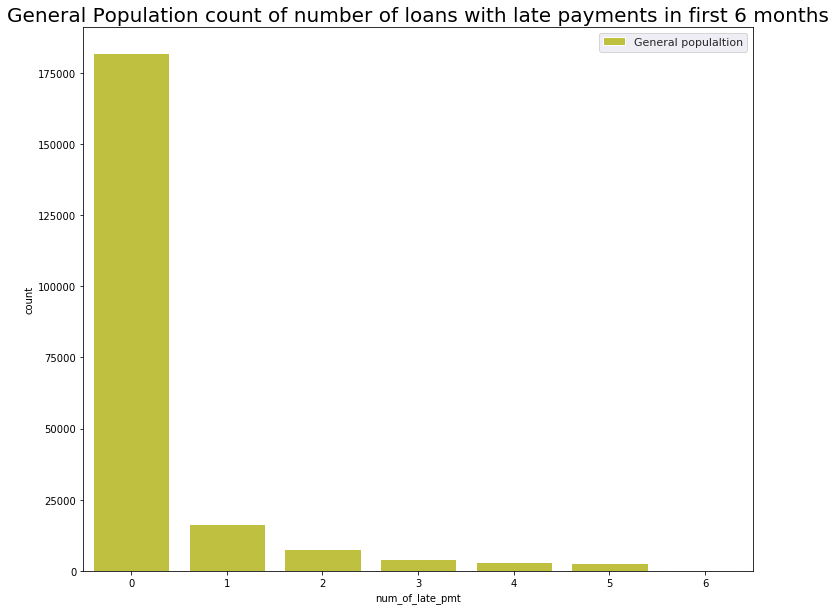

In [128]:
fig = plt.figure(figsize=(12,10))
plt.title('General Population count of number of loans with late payments in first 6 months', fontsize=20)
sns.set_theme(style="darkgrid")
sns.countplot(x='num_of_late_pmt', data=general_pmts, saturation=.5, color='yellow', label='General populaltion');

plt.legend();

In [129]:
show_proportions['general_proportions'] = general_pmts.groupby('num_of_late_pmt').size() / len(general_pmts)
show_proportions['good_general_proportions'] = good_loans.groupby('num_of_late_pmt').size() / len(good_loans)
show_proportions

,raleigh_proportions,lubbock_proportions,general_proportions,good_general_proportions
num_of_late_pmt,,,,
0,0.788280,0.846154,0.840783,0.841962
1,0.020794,0.035256,0.076462,0.076098
2,0.039698,0.041667,0.035299,0.035072
3,0.037807,0.025641,0.020077,0.019769
4,0.043478,0.019231,0.014135,0.013876
5,0.041588,0.022436,0.012475,0.012454
6,0.028355,0.009615,0.000768,0.000769


Perform a statistical test which will validate this observation. That is- compare the proportion of loans late by n months in each of the towns with that of the general population and test which of these are significantly different from the general population. Note that you are comparing 6 subsets of the same sample, so this may require some manipulation of your alpha values.

In [130]:
counts = [(show_proportions['raleigh_proportions'] * len(raleigh_pmts)).astype('int') , 
          (show_proportions['lubbock_proportions'] * len(lubbock_pmts)).astype('int'),
          (show_proportions['general_proportions'] * len(general_pmts)).astype('int'),
          (show_proportions['good_general_proportions'] * len(good_loans)).astype('int')
         ]
nobs = [len(raleigh_pmts), len(lubbock_pmts), len(general_pmts), len(good_loans)]

print(counts)
print(nobs)

[num_of_late_pmt
0    417
1     11
2     21
3     20
4     23
5     22
6     15
Name: raleigh_proportions, dtype: int64, num_of_late_pmt
0    264
1     11
2     13
3      8
4      6
5      7
6      3
Name: lubbock_proportions, dtype: int64, num_of_late_pmt
0    181832
1     16536
2      7634
3      4342
4      3057
5      2698
6       166
Name: general_proportions, dtype: int64, num_of_late_pmt
0    181730
1     16425
2      7569
3      4267
4      2995
5      2688
6       166
Name: good_general_proportions, dtype: int64]
[529, 312, 216265, 215841]


In [131]:
r_l_p_values = [] # raleigh - lebbock
for i in range(7):
    stat, p_value = proportions_ztest(count=[counts[0][i], counts[1][i]] , nobs=[nobs[0], nobs[1]], alternative='larger')
    r_l_p_values.append(p_value)
r_l_p_values

[0.980568532214643,
 0.8978473948147454,
 0.5556919086467901,
 0.17105130268372742,
 0.031327761815514825,
 0.07072450192620106,
 0.03483907766605757]

In [132]:
r_g_p_values = [] # raleigh - general
for i in range(7):
    stat, p_value = proportions_ztest(count=[counts[0][i], counts[2][i]] , nobs=[nobs[0], nobs[2]], alternative='two-sided')
    r_g_p_values.append(p_value)
r_g_p_values

[0.0009828237831398772,
 1.46305946901339e-06,
 0.5840777423119338,
 0.003723554905223137,
 1.2279536884005839e-08,
 1.87389739875555e-09,
 1.0279442714497056e-106]

In [133]:
l_g_p_values = [] # lubbock - general
for i in range(7):
    stat, p_value = proportions_ztest(count=[counts[1][i], counts[2][i]] , nobs=[nobs[1], nobs[2]], alternative='two-sided')
    l_g_p_values.append(p_value)
l_g_p_values

[0.7955637765735855,
 0.006182661353497188,
 0.5425484323006691,
 0.48392172585044946,
 0.44626151348174903,
 0.11340936794589987,
 2.2338744643834078e-08]

In [134]:
r_gg_p_values = [] # raleigh - general
for i in range(7):
    stat, p_value = proportions_ztest(count=[counts[0][i], counts[3][i]] , nobs=[nobs[0], nobs[3]], alternative='two-sided')
    r_gg_p_values.append(p_value)
r_gg_p_values

[0.0007260886571110619,
 1.625157243643319e-06,
 0.563185947250687,
 0.002945286391692673,
 6.693609066271883e-09,
 1.7659533528981165e-09,
 1.6928713889116364e-106]

In [135]:
l_gg_p_values = [] # lubbock - general
for i in range(7):
    stat, p_value = proportions_ztest(count=[counts[1][i], counts[3][i]] , nobs=[nobs[1], nobs[3]], alternative='two-sided')
    l_gg_p_values.append(p_value)
l_gg_p_values

[0.8392757365726851,
 0.0065344153998756664,
 0.5266453669892719,
 0.4566531442531985,
 0.4192188327371389,
 0.11231213779764576,
 2.318181878475804e-08]

In [136]:
heat_matrix = np.array(r_l_p_values + r_g_p_values + l_g_p_values + r_gg_p_values + l_gg_p_values).reshape((5,7))
heat_df = pd.DataFrame(data=heat_matrix.T, columns=['raleigh_lubbock', 'raleigh_general', 'lubbock_general', 'raleigh_good_general', 'lubbock_good_general'], index=(np.arange(7)))

First we verify that the handeling of null values does not effect the results


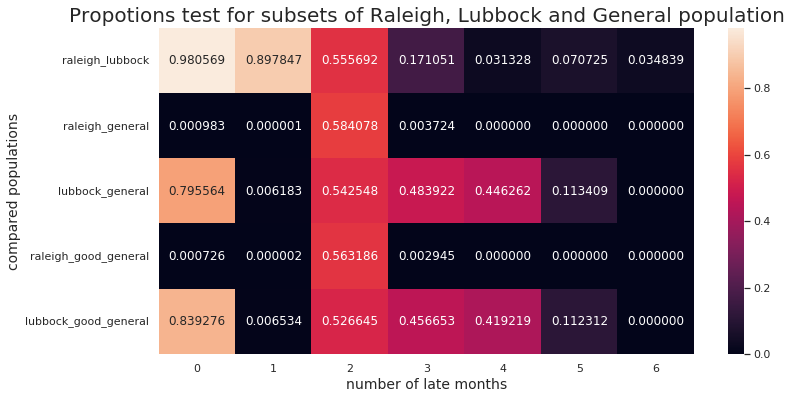

In [138]:
print("First we verify that the handeling of null values does not effect the results")
plt.figure(figsize=(12,6))
sns.heatmap(heat_df.T, annot=True, fmt="f");
plt.xlabel('number of late months', fontsize=14)
plt.ylabel('compared populations', fontsize=14)
plt.title('Propotions test for subsets of Raleigh, Lubbock and General population', fontsize=20);

In [146]:
heat_matrix = np.array(r_l_p_values + r_g_p_values + l_g_p_values).reshape((3,7))
heat_df = pd.DataFrame(data=heat_matrix.T, columns=['raleigh_lubbock ֿ', 'raleigh_general', 'lubbock_general'], index=(np.arange(7)))

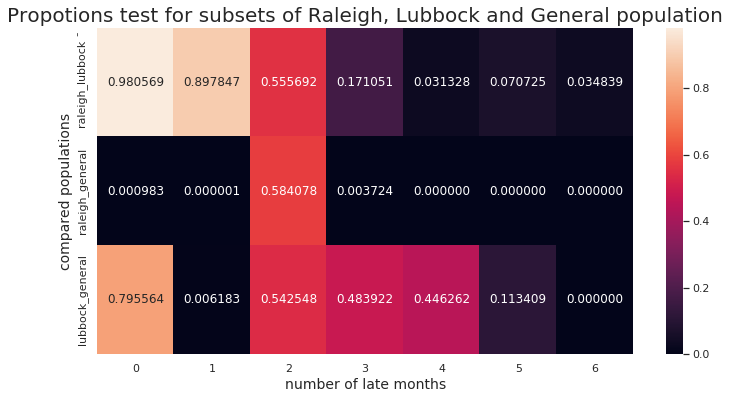

In [147]:
plt.figure(figsize=(12,6))
sns.heatmap(heat_df.T, annot=True, fmt="f");
plt.xlabel('number of late months', fontsize=14)
plt.ylabel('compared populations', fontsize=14)
plt.title('Propotions test for subsets of Raleigh, Lubbock and General population', fontsize=20);

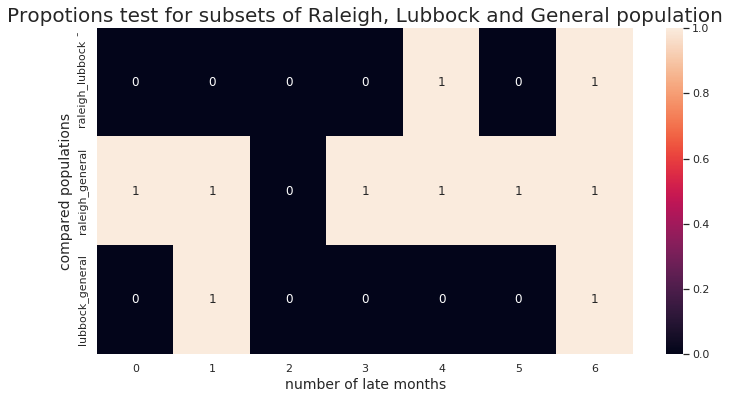

In [156]:
plt.figure(figsize=(12,6))
sns.heatmap(heat_df.T < 0.05, annot=True, fmt="b");
plt.xlabel('number of late months', fontsize=14)
plt.ylabel('compared populations', fontsize=14)
plt.title('Propotions test for subsets of Raleigh, Lubbock and General population', fontsize=20);

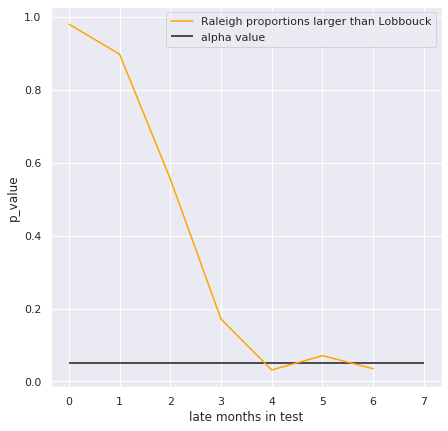

In [141]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(7),r_l_p_values,color='orange',label ='Raleigh proportions larger than Lobbouck')
plt.hlines(0.05,xmin=0,xmax=7,label="alpha value")
plt.ylabel("p_value")
plt.xlabel("late months in test")
plt.legend();